<a href="https://colab.research.google.com/github/Oscar25Xu/Analytics-for-Logistics-Supply-Chain-Management/blob/main/424_HW1_Q2%26Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study**


## **Question 1 ：For each policy, Lim should determine the class for each arriving pallet and each departing pallet so that the total travel distance in week 17 was minimised. She use the actual demands in Exhibit 2 to evaluate each policy**

Steps for Question 1：
1. calculate flow rate to select Top 10 product

2. Assign top 10 product to class
> 2.1 partitioning warehouse into 4 classes beased on  inbound and outbound distance frequency of sections (Done)  

 > 2.2 Calculate the distance from class to in-door and out-door

 > 2.3 Estimate the minimum initial inventory for Top 10 prodcut

 > 2.4 Assign Top 10 product into class based on each policy; and calculate total travel distance for each policy （LPM,TOD,TOS） 

     > (1) LPM 

    >(2)TOS

    >(3)TOD





**Answer**
1. For LPM policy, the optimal total travel distance in week 17 is 36016.04.
2. For TOS policy, based on our assigning rule, the total travel distance in week 17 is 22764.79.
3. For TOD policy, we have finished calculating the turnover rate for week 17and have also written a class assigning rule for the product as part of our TOD policy. The only pending task is to write the code.

### **Step 1- Calculate flow rate to select Top 10 product**

I calculate the flow amount for the first 16 weeks to pick up the top 10 product (we need to predict later) that has the largest flow amount. And use these 10 products to forecast the optimized distance.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [ ]:
#load two sheets seperatly
#load the first sheet, and add column names
df_inbound = pd.read_excel('/content/sample_data/SMU566-XLS-ENG(2).xlsx',sheet_name='Inbound', header=None, names=['day', 'product', 'inbound'])

# Load the second sheet of the Excel file as outbound
df_outbound = pd.read_excel('/content/sample_data/SMU566-XLS-ENG(2).xlsx',sheet_name='Outbound', header=None, names=['day', 'product', 'outbound'])

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
#look at the first 16 weeks data first
#df_inbound = df_inbound[df_inbound['day'] <= 16*6]
#df_outbound = df_outbound[df_outbound['day'] <= 16*6]
df_outbound

,day,product,outbound
0,1,3,10
1,1,7,10
2,1,9,1
3,1,12,4
4,1,14,4
...,...,...,...
2341,307,13,2
2342,307,14,1
2343,307,15,1
2344,307,16,2


In [ ]:
#Then merge two xlsx files using outer join on 'day' and 'product'
df_merged = pd.merge(df_inbound, df_outbound, on=['day', 'product'], how='outer')

# Fill NaN values with 0
df_merged.fillna(0, inplace=True)

# Sort the merged dataframe by 'day' and 'product'
df_merged.sort_values(['day', 'product'], inplace=True)

# Reset the index
df_merged.reset_index(drop=True, inplace=True)

# group the data by day and product, and calculate the sum of inbound and outbound amounts
df_flow = df_merged.groupby(['day', 'product'])['inbound', 'outbound'].sum()

# calculate the flow amount by adding inbound and outbound amounts
df_flow['flow_amount'] = df_flow['inbound'] + df_flow['outbound']

# filter the data for the first 16 weeks
df_flow_16weeks = df_flow[df_flow.index.get_level_values('day') <= 96]

# calculate the average flow amount for each product and sort by descending order
df_ranked = df_flow_16weeks.groupby('product')['flow_amount'].sum().sort_values(ascending=False)
df_ranked.head(10)


<ipython-input-126-bf751db275a1>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_flow = df_merged.groupby(['day', 'product'])['inbound', 'outbound'].sum()


product
1     3315.0
3     1423.0
2     1339.0
4     1271.0
9     1106.0
5     1030.0
7     1015.0
10     968.0
11     919.0
12     904.0
Name: flow_amount, dtype: float64

Here, we can see the top 10 flow amount products are 1,3,2,4,9,5,7,10,11,12

In [ ]:
products_to_select = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
filtered_data = df_merged[df_merged['product'].isin(products_to_select)]
#filtered_data.head(30)

In [ ]:
#for question 1: we need all 17th weeks' data, which is from (6*16+1) to (17*6)
df_flow_17th_week = filtered_data[(filtered_data['day'] <= 17*6) & ( filtered_data['day'] > 16*6)]
#df_flow_17th_week = filtered_data[filtered_data['day'] > 16*6]
df_flow_17th_week


,day,product,inbound,outbound
898,97,1,0.0,160.0
899,97,2,4.0,28.0
900,97,3,0.0,32.0
901,97,4,24.0,0.0
902,97,5,0.0,24.0
905,97,9,63.0,0.0
911,98,1,54.0,0.0
912,98,2,18.0,0.0
913,98,5,36.0,4.0
914,98,7,0.0,3.0


### **Step 2 - Assign top 10 product to class**

#### **2.1 partitioning warehouse into 4 classes beased on inbound and outbound distance frequency of each section**



In [ ]:
#set the coordinate for in_door and out_door
in_door = (0,37)
out_door = (2,0)

In [ ]:
#set a array to collect all space that forklift need to move to
spaces = []
for row in range(1,48):
    if row % 5 != 0:
        continue
    for col in range(0, 54):
        if col < 4 or col > 51:
            continue
  
        x = col
        #even rows are 1,3,5,7,9,11,13,15,17, they are located in 4th,9th,14th,19th,24th,29th,34th,39th and 44th row.
        #therefore the forklift should move to 3rd,8th,13th,18th,23rd,28th,33rd,38th and 43rd row which are the numbers dividable by 5 minus 2 in range (0,48).
        #the same way, odd rows are located in 5 dividable rows and the forklift should move to rows+1 th row.
        y_even = row+1
        y_odd = row-2 
        
        spaces.append((x, y_odd))
        spaces.append((x, y_even))

In [ ]:
#calculate the distance that forklift need to move to 
distances = []
for space in spaces:
    #the warehouse is a 73.125*65 meters rectangle and is divided into 54*48 small rectancles
    #therefore the length of each small rectancle is (73.125/54) and wide is (65/48) 
    dist_to_in_door = abs(space[0] - in_door[0])*(73.125/54) + abs(space[1] - in_door[1])*(65/48)
    dist_to_out_door = abs(space[0] - out_door[0])*(73.125/54) + abs(space[1] - out_door[1])*(65/48)
    total_dist = dist_to_in_door + dist_to_out_door
    distances.append((space, total_dist))

#sort the distance 
distances.sort(key=lambda x: x[1])

#and then divide it into 4 classes by percentile
dist_values = [x[1] for x in distances]
quartiles = np.percentile(dist_values, [25, 50, 75])
class1 = [x[0] for x in distances if x[1] <= quartiles[0]]
class2 = [x[0] for x in distances if quartiles[0] < x[1] <= quartiles[1]]
class3 = [x[0] for x in distances if quartiles[1] < x[1] <= quartiles[2]]
class4 = [x[0] for x in distances if x[1] > quartiles[2]]

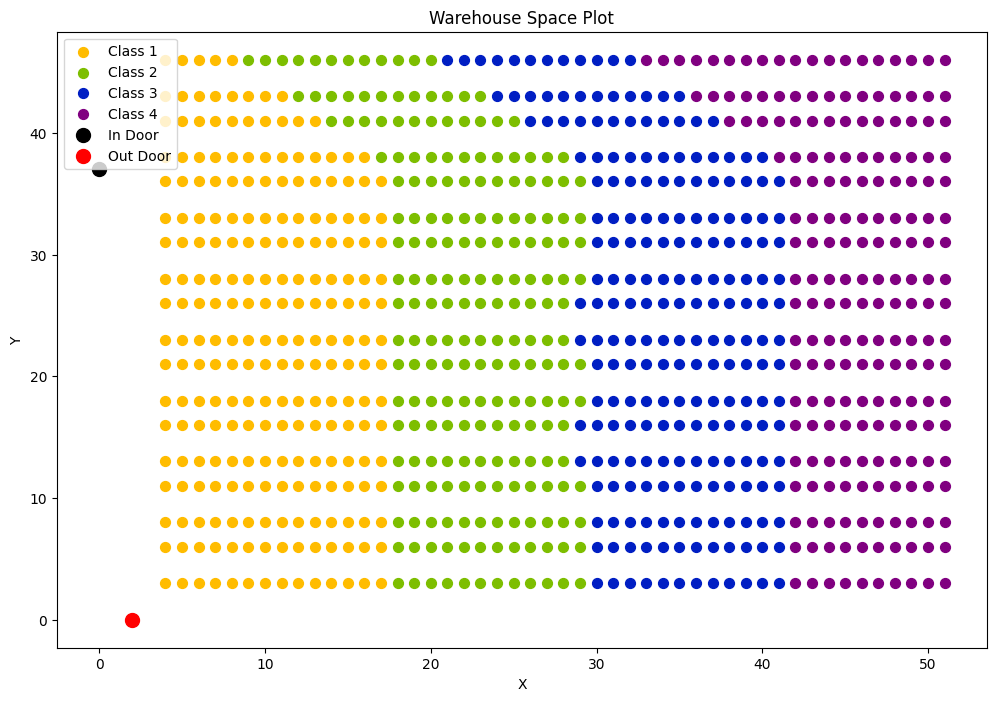

In [ ]:
# define the colors for the classes using gradient green
cmap = colors.LinearSegmentedColormap.from_list("", ["red", "orange", "yellow", "green", "blue", "purple"])

# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# plot the spaces
ax.scatter([space[0] for space in class1], [space[1] for space in class1], color=cmap(0.25), label='Class 1', s=50)
ax.scatter([space[0] for space in class2], [space[1] for space in class2], color=cmap(0.50), label='Class 2', s=50)
ax.scatter([space[0] for space in class3], [space[1] for space in class3], color=cmap(0.75), label='Class 3', s=50)
ax.scatter([space[0] for space in class4], [space[1] for space in class4], color=cmap(1.0), label='Class 4', s=50)

# plot the in_door and out_door
ax.scatter(in_door[0], in_door[1], color='black', label='In Door', s=100)
ax.scatter(out_door[0], out_door[1], color='red', label='Out Door', s=100)

# set the title and labels
ax.set_title('Warehouse Space Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# add the legend
ax.legend()

#### **2.2 Calculate the distance from class to in-door and out-door**

we use average distance to estimate s_j & r_j for each class

In [ ]:
# calculate average distance to in_door and out_door for each class
class_distances = [class1, class2, class3, class4]

avg_distances = np.zeros((4, 2))  # create a matrix of zeros with shape (4, 2)

for i in range(4):
    distances = class_distances[i]
    total_dist_in = 0
    total_dist_out = 0
    for space in distances:
        dist_to_in_door = abs(space[0] - in_door[0])*(73.125/54) + abs(space[1] - in_door[1])*(65/48)
        dist_to_out_door = abs(space[0] - out_door[0])*(73.125/54) + abs(space[1] - out_door[1])*(65/48)
        total_dist_in += dist_to_in_door
        total_dist_out += dist_to_out_door
    avg_dist_in = total_dist_in / len(distances)
    avg_dist_out = total_dist_out / len(distances)
    avg_distances[i, 0] = avg_dist_in  # assign the average distances to the matrix
    avg_distances[i, 1] = avg_dist_out

print(avg_distances)

[[34.66549928 42.02002514]
 [50.01474057 60.74587264]
 [66.44034091 76.78125   ]
 [80.68802083 94.90677083]]


In [ ]:
# extract the first column as s
# extract the second column as r
s_j = avg_distances[:, 0]
r_j = avg_distances[:, 1]
# print s_j
print(s_j)
print(r_j)

[34.66549928 50.01474057 66.44034091 80.68802083]
[42.02002514 60.74587264 76.78125    94.90677083]


 
 #### **2.3 Estimate the minimum initial inventory for Top 10 prodcut**


To calculate the minimum initial inventory for Top 10 product in Day 1 to ensure that it has enough outbound for each day, we can follow these steps:

1.   Calculate the cumulative inbound and outbound for each product and day.
2.   Calculate the difference between cumulative inbound and outbound for each   product and day.
3. Find the minimum difference for each product.
4. If the minimum difference is negative, its absolute value represents the minimum initial inventory required for that product



In [ ]:
#Then merge two xlsx files using outer join on 'day' and 'product'
df_merged = pd.merge(df_inbound, df_outbound, on=['day', 'product'], how='outer')

# Fill NaN values with 0
df_merged.fillna(0, inplace=True)

# Sort the merged dataframe by 'day' and 'product'
df_merged.sort_values(['day', 'product'], inplace=True)

# Reset the index
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_filtered = df_merged[(df_merged['product'].isin(desired_products))].copy()

# Calculate the cumulative sum of inbound and outbound for each product
df_filtered['cum_inbound'] = df_filtered.groupby('product')['inbound'].cumsum()
df_filtered['cum_outbound'] = df_filtered.groupby('product')['outbound'].cumsum()

# Calculate the difference between cumulative inbound and outbound
df_filtered['difference'] = df_filtered['cum_inbound'] - df_filtered['cum_outbound']

# Find the minimum difference for each product
min_difference = df_filtered.groupby('product')['difference'].min().reset_index()

# If the minimum difference is negative, take its absolute value as the minimum initial inventory required
min_difference['min_initial_inventory'] = min_difference['difference'].apply(lambda x: abs(x) if x < 0 else 0)

print(min_difference[['product', 'min_initial_inventory']])

   product  min_initial_inventory
0        1                  115.0
1        2                  188.0
2        3                 4035.0
3        4                    0.0
4        5                  245.0
5        7                 3022.0
6        9                    0.0
7       10                 2590.0
8       11                    0.0
9       12                 2657.0


#### **2.4 Assign Top 10 product into class based on each policy; and calculate total travel distance for each policy （LPM,TOD,TOS）**



**2.4.1 Calculate the inbound and outbound flow for Top 10 product of 17th_week**

In [ ]:
#Then merge two xlsx files using outer join on 'day' and 'product'
df_merged = pd.merge(df_inbound, df_outbound, on=['day', 'product'], how='outer')

# Fill NaN values with 0
df_merged.fillna(0, inplace=True)

# Sort the merged dataframe by 'day' and 'product'
df_merged.sort_values(['day', 'product'], inplace=True)

# Reset the index
df_merged.reset_index(drop=True, inplace=True)

# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
week_17th = [97,98,99,100,101,102]

# Filter the DataFrame to include only rows in week 17 and the desired products, then create a new DataFrame
df_flow_17th_week = df_merged[(df_merged['day'].isin(week_17th)) & (df_merged['product'].isin(desired_products))].copy()

df_flow_17th_week

,day,product,inbound,outbound
898,97,1,0.0,160.0
899,97,2,4.0,28.0
900,97,3,0.0,32.0
901,97,4,24.0,0.0
902,97,5,0.0,24.0
905,97,9,63.0,0.0
911,98,1,54.0,0.0
912,98,2,18.0,0.0
913,98,5,36.0,4.0
914,98,7,0.0,3.0


**2.4.2 Calculate variable" a_it " and "d_it" for Top 10 product**

In [ ]:
# Get the unique days in the dataframe
#days = df_inbound['day'].unique()

# Create an empty numpy array to store the values of a_it
a_it = np.zeros((20, 7))
d_it = np.zeros((20, 7))

# Loop through each product and day and get the corresponding value of a_it
for i in range(20):
    for t in range(7):
        day = t + 96
        if i in df_flow_17th_week['product'].values:
            inbound_values = df_flow_17th_week.loc[(df_flow_17th_week['product'] == i) & (df_flow_17th_week['day'] == day), 'inbound'].values
            if len(inbound_values) > 0:
                a_it[i][t] = inbound_values[0]
            else:
                a_it[i][t] = 0
        else:
            a_it[i][t] = 0
        

for i in range(20):
    for t in range(7):
        day = t + 96
        if i in df_flow_17th_week['product'].values:
            outbound_values = df_flow_17th_week.loc[(df_flow_17th_week['product'] == i) & (df_flow_17th_week['day'] == day), 'outbound'].values
            if len(outbound_values) > 0:
                d_it[i][t] = outbound_values[0]
            else:
                d_it[i][t] = 0
        else:
            d_it[i][t] = 0

**2.4.3 LPM Policy**

**For LPM policy, the optimal total travel distance in week 17 is 36016.04**.


> for detailed calculation please see the code shown as below:



In [ ]:
!pip install pulp
import pulp

#M = products_to_select
N = 4
M = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
T = [97, 98, 99, 100, 101, 102]

# capacity c
c_j = [1068, 964, 1004, 900]

# Define the problem
problem = pulp.LpProblem("Warehouse_Optimization", pulp.LpMinimize)

# Define decision variables
v = pulp.LpVariable.dicts("v", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
w = pulp.LpVariable.dicts("w", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
x = pulp.LpVariable.dicts("x", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")

# Define objective function
problem += pulp.lpSum(s_j[j] * v[i, j, t] + r_j[j] * w[i, j, t] for i in M for j in range(N) for t in T)

# Add constraints
for i in M:
    for t in T:
        problem += pulp.lpSum(v[i, j, t] for j in range(N)) == a_it[i][t-97]  # constraint 1
        problem += pulp.lpSum(w[i, j, t] for j in range(N)) == d_it[i][t-97]  # constraint 2

for i in M:
    for j in range(N):
        for t in T[:-1]:
            problem += v[i, j, t] - w[i, j, t] + x[i, j, t] == x[i, j, t + 1]  # constraint 3

for j in range(N):
    for t in T:
        problem += pulp.lpSum(x[i, j, t] + v[i, j, t] for i in M) <= c_j[j]  # constraint 4

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal Solution:", pulp.value(problem.objective))

# Print decision variables
for variable in problem.variables():
    if variable.varValue > 0:
        print(variable.name, "=", variable.varValue)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Status: Optimal
Optimal Solution: 36016.04121767242
v_(1,_0,_100) = 19.0
v_(1,_0,_101) = 18.0
v_(1,_0,_102) = 72.0
v_(1,_0,_99) = 54.0
v_(2,_0,_98) = 4.0
v_(2,_0,_99) = 18.0
v_(4,_0,_98) = 24.0
v_(5,_0,_102) = 19.0
v_(5,_0,_99) = 36.0
v_(9,_0,_102) = 38.0
v_(9,_0,_98) = 63.0
w_(1,_0,_102) = 4.0
w_(1,_0,_98) = 160.0
w_(10,_0,_100) = 68.0
w_(10,_0,_99) = 104.0
w_(11,_0,_99) = 2.0
w_(12,_0,_101) = 47.0
w_(2,_0,_101) = 7.0
w_(2,_0,_98) = 28.0
w_(3,_0,_100) = 2.0
w_(3,_0,_101) = 18.0
w_(3,_0,_98) = 32.0
w_(5,_0,_101) = 9.0
w_(5,_0,_102) = 10.0
w_(5,_0,_98) = 24.0
w_(5,_0,_99) = 4.0
w_(7,_0,_101) = 4.0
w_(7,_0,_102) = 28.0
w_(7,_0,_99) = 3.0
w_(9,_0,_102) = 2.0
x_(1,_0,_100) = 54.0
x_(1,_0,_101) = 73.0
x_(1,_0,_102) = 91.0
x_(1,_0,_97) = 160.0
x_(1,_0,_98) = 160.0
x_(10,_0,_100) = 68.0
x_(10,_0,_97) = 172.0
x_(10,_0,_98) = 172.0
x_(10,_0,_99) = 172.0
x_(11,_0,_97) = 2.0
x_(11,_0,_98) = 2.0
x_(1

Note: explaination for the result:v_(product id,class No., Day) & w_(product id,class No., Day) ; and Class No. = [0,1,2,3] represent [class1,class2,class3,class4]; v_(1,_0,_100) means the arrivals of product 1 in Day 100 is assigned to class 1. 

**2.4.4. TOS Policy**

**For TOS policy, based on our assigning rule, the  total travel distance in week 17 is 22764.79**.


> for detailed calculation please see the code shown as below:

- **calculate turnover rate based on TOS policy**

In [ ]:
# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_filtered = df_merged[(df_merged['day'] <= 96) & (df_merged['product'].isin(desired_products))].copy()

# Calculate the cumulative sum of inbound and outbound for each product
df_filtered['cum_inbound'] = df_filtered.groupby('product')['inbound'].cumsum()
df_filtered['cum_outbound'] = df_filtered.groupby('product')['outbound'].cumsum()

# Get the cumulative inbound and outbound amounts for each product at Day 96
cumulative_amounts = df_filtered[df_filtered['day'] < 97].groupby('product')[['cum_inbound', 'cum_outbound']].last().reset_index()

# Set the initial inventory values based on the updated table
initial_inventory = pd.DataFrame({'product': [1, 2, 3, 4, 5, 7, 9, 10, 11, 12],
                                  'min_initial_inventory': [115.0, 188.0, 4035.0, 0.0, 245.0, 3022.0, 0.0, 2590.0, 0.0, 2657.0]})

# Merge the initial_inventory DataFrame with the cumulative_amounts DataFrame
inventory_df = pd.merge(initial_inventory, cumulative_amounts, on='product')

# Calculate the inventory at the start of Day 97 for each product
inventory_df['inventory_day_97'] = inventory_df['min_initial_inventory'] + inventory_df['cum_inbound'] - inventory_df['cum_outbound']

#print(inventory_df[['product', 'inventory_day_97']])
inventory_df = inventory_df[(inventory_df['product'].isin(desired_products))]

inventory_df

,product,min_initial_inventory,cum_inbound,cum_outbound,inventory_day_97
0,1,115.0,1715.0,1600.0,230.0
1,2,188.0,615.0,724.0,79.0
2,3,4035.0,0.0,1423.0,2612.0
3,4,0.0,1271.0,0.0,1271.0
4,5,245.0,468.0,562.0,151.0
5,7,3022.0,53.0,962.0,2113.0
6,9,0.0,1035.0,71.0,964.0
7,10,2590.0,12.0,956.0,1646.0
8,11,0.0,884.0,35.0,849.0
9,12,2657.0,0.0,904.0,1753.0


In [ ]:
#get the initial inventory for week 17
# Assuming inventory_df is already created
inventory_i = np.zeros(20)

for i in range(20):
    if i in inventory_df['product'].values:
        inventory_i[i] = inventory_df.loc[inventory_df['product'] == i, 'inventory_day_97'].values[0]
    else:
        inventory_i[i] = 0

print(inventory_i)

[   0.  230.   79. 2612. 1271.  151.    0. 2113.    0.  964. 1646.  849.
 1753.    0.    0.    0.    0.    0.    0.    0.]


In [ ]:

#calculate the turnover rate for selected top 10 product
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

for i in range(20):
    for t in range(7):
        day = t + 97
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 97:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
            turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
            turnover_rates[i].append(turnover_rate)
        else:
            starting_inv[i][t] = 0

    avg_turnover_rates = sum(turnover_rates[i]) / 6
    product_weekly_turnover_rates.append(avg_turnover_rates)
    print(f"product ({i}): {avg_turnover_rates}")

product (0): 0.0
product (1): 0.6005271633757749
product (2): 0.16649504322946654
product (3): 0.003890823700584689
product (4): 0.003088803088803089
product (5): 0.11382310701728321
product (6): 0.0
product (7): 0.0057375676029401
product (8): 0.0
product (9): 0.016652448341825356
product (10): 0.018929641381584
product (11): 0.0003935458480913026
product (12): 0.007070320681761703
product (13): 0.0
product (14): 0.0
product (15): 0.0
product (16): 0.0
product (17): 0.0
product (18): 0.0
product (19): 0.0


**Assigning rule based on TOS turnover rate:**

1. Sort products by their 17th week TOS turnover rate in descending order. Products with higher turnover rates should be placed closer to the door to minimize travel distance.

2. Assign products to each class according to product turnover rates. Fill up the classes starting from Class 1 and moving to Class 4. In the order of turnover rate from high to low, distribute the products into each class evenly.

3. For each arriving pallet, place it in the appropriate class based on the product's turnover rate  If the designated class is full, place the pallet in the next closest class with available space.

4. For each departing pallet, retrieve it from its assigned class. The pallet's class assignment should be determined by the product's turnover rate and the initial class assignment.


In [ ]:
# Input data
# s_j, r_j
warehouse_data = np.array([
    [34.66549928, 42.02002514],
    [50.01474057, 60.74587264],
    [66.44034091, 76.78125],
    [80.68802083, 94.90677083]
])
selected_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
turnover_rates = [product_weekly_turnover_rates[i] for i in selected_products]
turnover_rates

[0.6005271633757749,
 0.003890823700584689,
 0.16649504322946654,
 0.003088803088803089,
 0.016652448341825356,
 0.11382310701728321,
 0.0057375676029401,
 0.018929641381584,
 0.0003935458480913026,
 0.007070320681761703]

In [ ]:
# Assign selected products to the four classes based on turnover rates
class_indices = np.argsort(turnover_rates)[::-1] // 3
class_indices

array([0, 0, 1, 2, 1, 3, 2, 0, 1, 2])

In [ ]:
# Find the cumulative inbound and outbound in week 17
# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_week17 = df_merged[(df_merged['day'] >=97) & (df_merged['day'] < 103) & (df_merged['product'].isin(desired_products))].copy()

# Aggregate the daily data into the total inbound and outbound of each product
total_data = df_week17.groupby('product').agg({'inbound': 'sum', 'outbound': 'sum'}).reset_index()

print(total_data)

   product  inbound  outbound
0        1    181.0     208.0
1        2     22.0      39.0
2        3      0.0      60.0
3        4     24.0       0.0
4        5     55.0      47.0
5        7      0.0      71.0
6        9    101.0       3.0
7       10      0.0     172.0
8       11      0.0       2.0
9       12      0.0      72.0


In [ ]:
# Calculate the average weekly travel distance
avg_travel_distances = np.zeros(4)
num_products_in_class = np.zeros(4)

for idx, class_idx in enumerate(class_indices):
    avg_travel_distances[class_idx] += (
        warehouse_data[class_idx][0]*total_data.iloc[idx,1] + warehouse_data[class_idx][1]*total_data.iloc[idx,2]
    )
    num_products_in_class[class_idx] += 1

avg_travel_distances /= num_products_in_class

In [ ]:
print(" 17th week travel distances for the selected products by class:")
for i, distance in enumerate(avg_travel_distances):
    print(f"Class {i + 1}: {distance:.2f}")

 17th week travel distances for the selected products by class:
Class 1: 8214.50
Class 2: 3124.04
Class 3: 4687.88
Class 4: 6738.38


In [ ]:
# Calculate the sum of travel distances
sum_travel_distances = sum(avg_travel_distances)
print("Sum of travel distances:", sum_travel_distances)

Sum of travel distances: 22764.792095716664


**2.4.5. TOD Policy**

**Assigning rule based on TOD turnover rate:**

1. For each period t, sort the products based on their turnover rates in descending order.

2. Assign the products to the classes in the warehouse according to their ranking in the sorted list. The class that is the closest to in-door and out-door should be assigned to the product with the highest turnover rate.

3. Continue assigning the products to classes in descending order of turnover rates. When a class is full, move on to the next most economic class.

4. Repeat steps 2-4 for each period t.

- **caluate turnover rate based on TOD policy**

In [ ]:
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

for i in range(20):
    for t in range(7):
        day = t + 97
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 97:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
                turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
                print("Product:",i,"Day:",t,"Dynamic Turnover Rate:",turnover_rate)
        else:
            starting_inv[i][t] = 0

Product: 1 Day: 1 Dynamic Turnover Rate: 2.2857142857142856
Product: 1 Day: 2 Dynamic Turnover Rate: 0.43548387096774194
Product: 1 Day: 3 Dynamic Turnover Rate: 0.13286713286713286
Product: 1 Day: 4 Dynamic Turnover Rate: 0.11180124223602485
Product: 1 Day: 5 Dynamic Turnover Rate: 0.3318777292576419
Product: 1 Day: 6 Dynamic Turnover Rate: 0.3054187192118227
Product: 2 Day: 1 Dynamic Turnover Rate: 0.5818181818181818
Product: 2 Day: 2 Dynamic Turnover Rate: 0.2465753424657534
Product: 2 Day: 3 Dynamic Turnover Rate: 0.0
Product: 2 Day: 4 Dynamic Turnover Rate: 0.10606060606060606
Product: 2 Day: 5 Dynamic Turnover Rate: 0.0
Product: 2 Day: 6 Dynamic Turnover Rate: 0.06451612903225806
Product: 3 Day: 1 Dynamic Turnover Rate: 0.012403100775193798
Product: 3 Day: 2 Dynamic Turnover Rate: 0.0
Product: 3 Day: 3 Dynamic Turnover Rate: 0.0007757951900698216
Product: 3 Day: 4 Dynamic Turnover Rate: 0.00703125
Product: 3 Day: 5 Dynamic Turnover Rate: 0.0
Product: 3 Day: 6 Dynamic Turnover Rat

In [ ]:
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

for i in range(20):
    for t in range(7):
        day = t + 97
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 97:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
                turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
                print("Product:",i,"Day:",t,"Dynamic Turnover Rate:",turnover_rate)

                
        else:
            starting_inv[i][t] = 0

Product: 1 Day: 1 Dynamic Turnover Rate: 2.2857142857142856
Product: 1 Day: 2 Dynamic Turnover Rate: 0.43548387096774194
Product: 1 Day: 3 Dynamic Turnover Rate: 0.13286713286713286
Product: 1 Day: 4 Dynamic Turnover Rate: 0.11180124223602485
Product: 1 Day: 5 Dynamic Turnover Rate: 0.3318777292576419
Product: 1 Day: 6 Dynamic Turnover Rate: 0.3054187192118227
Product: 2 Day: 1 Dynamic Turnover Rate: 0.5818181818181818
Product: 2 Day: 2 Dynamic Turnover Rate: 0.2465753424657534
Product: 2 Day: 3 Dynamic Turnover Rate: 0.0
Product: 2 Day: 4 Dynamic Turnover Rate: 0.10606060606060606
Product: 2 Day: 5 Dynamic Turnover Rate: 0.0
Product: 2 Day: 6 Dynamic Turnover Rate: 0.06451612903225806
Product: 3 Day: 1 Dynamic Turnover Rate: 0.012403100775193798
Product: 3 Day: 2 Dynamic Turnover Rate: 0.0
Product: 3 Day: 3 Dynamic Turnover Rate: 0.0007757951900698216
Product: 3 Day: 4 Dynamic Turnover Rate: 0.00703125
Product: 3 Day: 5 Dynamic Turnover Rate: 0.0
Product: 3 Day: 6 Dynamic Turnover Rat

## **Question 2 ：Following the moving-average forecasting method, repeat Question (1) for each ofthe remaining weeks (week 18 to week 52). Which policy gives the smallest average weekly travel distance?**

**Answer**

based on up to date  calculation, **LPM gives the smallest average weekly travel distance.**


1. Average weekly travel distance for LPM policy is 60791.48
2. Average weekly travel distance for TOS policy is 24017.990733906663
3. for TOD policy, we have also written a class assigning rule in Question 1(step2-2.4.5. TOD Policy). The only pending task is to write the code.

#### **2.1 LPM Policy**

**Result : Average weekly travel distance for LPM policy is 60791.48** 

Detailed calculation is shown as below:

In [ ]:
df_merged_desired = df_merged[df_merged['product'].isin(desired_products)]
df_merged_desired_16weeks = df_merged_desired[df_merged_desired['day']<=96]
df_merged_desired_16weeks

,day,product,inbound,outbound
0,1,1,18.0,0.0
1,1,3,0.0,10.0
2,1,4,1.0,0.0
3,1,5,55.0,0.0
4,1,7,17.0,10.0
...,...,...,...,...
888,96,3,0.0,72.0
889,96,4,70.0,0.0
890,96,5,0.0,17.0
892,96,9,0.0,1.0


 - we use moving average to forcast demand:

In [ ]:
all_results = []
for i in range (17,52):
  start_day = i*6 +1
  end_day = i*6 +6
  moving_average_days = 96

  filtered_df = df_merged_desired[df_merged_desired['product'].isin(desired_products)]

  filtered_df['inbound_ma'] = filtered_df.groupby('product')['inbound'].transform(lambda x: x.rolling(window=moving_average_days, min_periods=1).mean())
  filtered_df['outbound_ma'] = filtered_df.groupby('product')['outbound'].transform(lambda x: x.rolling(window=moving_average_days, min_periods=1).mean())

  results = []
  for product in desired_products:
      product_data = filtered_df[filtered_df['product'] == product]

      for day in range(start_day, end_day + 1):
          lower_bound = day - 96
          upper_bound = day - 1
          product_data_filtered = product_data[(product_data['day'] >= lower_bound) & (product_data['day'] <= upper_bound)]

          average_inbound = product_data_filtered['inbound'].mean()
          average_outbound = product_data_filtered['outbound'].mean()
          results.append({'day': day, 'product': product, 'inbound': average_inbound,'outbound': average_outbound})

  result_df = pd.DataFrame(results)
  all_results.append(result_df)

final_result_df = pd.concat(all_results, ignore_index=True)
#print(final_result_df)

concatenated_df = pd.concat([df_merged_desired_16weeks, final_result_df], ignore_index=True)
print(concatenated_df)

      day  product  inbound   outbound
0       1        1     18.0   0.000000
1       1        3      0.0  10.000000
2       1        4      1.0   0.000000
3       1        5     55.0   0.000000
4       1        7     17.0  10.000000
...   ...      ...      ...        ...
2643  308       12      0.0  11.344262
2644  309       12      0.0  11.344262
2645  310       12      0.0  11.344262
2646  311       12      0.0  11.433333
2647  312       12      0.0  11.423729

[2648 rows x 4 columns]


- calculate average weekly travel distance for LPM policy

In [ ]:
# Create an empty numpy array to store the values of a_it
a_it = np.zeros((20, 313))
d_it = np.zeros((20, 313))

# Loop through each product and day and get the corresponding value of a_it
for i in range(20):
    for t in range(97,313):
        day = t
        if i in concatenated_df['product'].values:
            inbound_values = concatenated_df.loc[(concatenated_df['product'] == i) & (concatenated_df['day'] == day), 'inbound'].values
            if len(inbound_values) > 0:
                a_it[i][t] = inbound_values[0]
            else:
                a_it[i][t] = 0
        else:
            a_it[i][t] = 0
        

for i in range(20):
    for t in range(97,313):
        day = t
        if i in concatenated_df['product'].values:
            outbound_values = concatenated_df.loc[(concatenated_df['product'] == i) & (concatenated_df['day'] == day), 'outbound'].values
            if len(outbound_values) > 0:
                d_it[i][t] = outbound_values[0]
            else:
                d_it[i][t] = 0
        else:
            d_it[i][t] = 0

In [ ]:
!pip install pulp
import pulp

N = 4
M = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

result_list = []  # create an empty list to store the objective function values

for k in range(18, 52):
    T = [6 * k + 1, 6 * k + 2, 6 * k + 3, 6 * k + 4, 6 * k + 5, 6 * k + 6]

    c_j = [1068, 964, 1004, 900]

    problem = LpProblem("Warehouse_Optimization", LpMinimize)

    v = LpVariable.dicts("v", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
    w = LpVariable.dicts("w", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
    x = LpVariable.dicts("x", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")

    problem += lpSum(s_j[j] * v[i, j, t] + r_j[j] * w[i, j, t] for i in M for j in range(N) for t in T)

    for i in M:
        for t in T:
            problem += lpSum(v[i, j, t] for j in range(N)) == a_it[i][t]
            problem += lpSum(w[i, j, t] for j in range(N)) == d_it[i][t]

    for i in M:
        for j in range(N):
            for t in T[:-1]:
                problem += v[i, j, t] - w[i, j, t] + x[i, j, t] == x[i, j, t + 1]

    for j in range(N):
        for t in T:
            problem += lpSum(x[i, j, t] + v[i, j, t] for i in M) <= c_j[j]

    problem.solve()

    result_list.append(value(problem.objective))  # append the objective function value to the list

    print(f"Status week{k}: {LpStatus[problem.status]}")
    print("Optimal Solution:", value(problem.objective))

mean_result = sum(result_list) / len(result_list)  # calculate the mean of the objective function values

print(f"Mean of objective function values: {mean_result}")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Status week18: Optimal
Optimal Solution: 60966.02374431449
Status week19: Optimal
Optimal Solution: 61803.623520500965
Status week20: Optimal
Optimal Solution: 62565.9749195253
Status week21: Optimal
Optimal Solution: 62680.79175305926
Status week22: Optimal
Optimal Solution: 63715.084262078075
Status week23: Optimal
Optimal Solution: 62966.28690237116
Status week24: Optimal
Optimal Solution: 62700.60546093351
Status week25: Optimal
Optimal Solution: 62066.18070267868
Status week26: Optimal
Optimal Solution: 61750.09216456542
Status week27: Optimal
Optimal Solution: 63393.58382125607
Status week28: Optimal
Optimal Solution: 64036.95746882826
Status week29: Optimal
Optimal Solution: 64285.92378030407
Status week30: Optimal
Optimal Solution: 63535.266960347115
Status week31: Optimal
Optimal Solution: 63116.85615899149
Status week32: Optimal
Optimal Solution: 63332.153657800496
Status week33

#### **2.2 TOS Policy**

**Result : Average weekly travel distance for TOS policy is 24017.990733906663**

Detailed calculation is shown as below:

In [ ]:
# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_filtered = df_merged[(df_merged['day'] <= 102) & (df_merged['product'].isin(desired_products))].copy()

# Calculate the cumulative sum of inbound and outbound for each product
df_filtered['cum_inbound'] = df_filtered.groupby('product')['inbound'].cumsum()
df_filtered['cum_outbound'] = df_filtered.groupby('product')['outbound'].cumsum()

# Get the cumulative inbound and outbound amounts for each product at Day 96
cumulative_amounts = df_filtered[df_filtered['day'] <= 102].groupby('product')[['cum_inbound', 'cum_outbound']].last().reset_index()

# Set the initial inventory values based on the updated table
initial_inventory = pd.DataFrame({'product': [1, 2, 3, 4, 5, 7, 9, 10, 11, 12],
                                  'min_initial_inventory': [115.0, 188.0, 4035.0, 0.0, 245.0, 3022.0, 0.0, 2590.0, 0.0, 2657.0]})

# Merge the initial_inventory DataFrame with the cumulative_amounts DataFrame
inventory_df = pd.merge(initial_inventory, cumulative_amounts, on='product')

# Calculate the inventory at the start of Day 97 for each product
inventory_df['inventory_day_102'] = inventory_df['min_initial_inventory'] + inventory_df['cum_inbound'] - inventory_df['cum_outbound']

#print(inventory_df[['product', 'inventory_day_97']])
inventory_df = inventory_df[(inventory_df['product'].isin(desired_products))]

inventory_df

,product,min_initial_inventory,cum_inbound,cum_outbound,inventory_day_102
0,1,115.0,1896.0,1808.0,203.0
1,2,188.0,637.0,763.0,62.0
2,3,4035.0,0.0,1483.0,2552.0
3,4,0.0,1295.0,0.0,1295.0
4,5,245.0,523.0,609.0,159.0
5,7,3022.0,53.0,1033.0,2042.0
6,9,0.0,1136.0,74.0,1062.0
7,10,2590.0,12.0,1128.0,1474.0
8,11,0.0,884.0,37.0,847.0
9,12,2657.0,0.0,976.0,1681.0


In [ ]:
#get the initial inventory for week 18
# Assuming inventory_df is already created
inventory_i = np.zeros(20)

for i in range(20):
    if i in inventory_df['product'].values:
        inventory_i[i] = inventory_df.loc[inventory_df['product'] == i, 'inventory_day_102'].values[0]
    else:
        inventory_i[i] = 0

print(inventory_i)

[   0.  203.   62. 2552. 1295.  159.    0. 2042.    0. 1062. 1474.  847.
 1681.    0.    0.    0.    0.    0.    0.    0.]


In [ ]:

#calculate the turnover rate for selected top 10 product
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

for i in range(20):
    for t in range(7):
        day = t + 103
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 103:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
            turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
            turnover_rates[i].append(turnover_rate)
        else:
            starting_inv[i][t] = 0

    avg_turnover_rates = sum(turnover_rates[i]) / 6
    product_weekly_turnover_rates.append(avg_turnover_rates)
    print(f"product ({i}): {avg_turnover_rates}")

product (0): 0.0
product (1): 0.8840438460297183
product (2): 0.2325466443887496
product (3): 0.00398382779119051
product (4): 0.003032600454890068
product (5): 0.10798557596480739
product (6): 0.0
product (7): 0.005942153752586357
product (8): 0.0
product (9): 0.015219187779064816
product (10): 0.02135662521817455
product (11): 0.0003944773175542406
product (12): 0.007383561814041224
product (13): 0.0
product (14): 0.0
product (15): 0.0
product (16): 0.0
product (17): 0.0
product (18): 0.0
product (19): 0.0


In [ ]:
# Input data
# s_j, r_j
warehouse_data = np.array([
    [34.66549928, 42.02002514],
    [50.01474057, 60.74587264],
    [66.44034091, 76.78125],
    [80.68802083, 94.90677083]
])
selected_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
turnover_rates = [product_weekly_turnover_rates[i] for i in selected_products]
turnover_rates

[0.8840438460297183,
 0.00398382779119051,
 0.2325466443887496,
 0.003032600454890068,
 0.015219187779064816,
 0.10798557596480739,
 0.005942153752586357,
 0.02135662521817455,
 0.0003944773175542406,
 0.007383561814041224]

In [ ]:
# Assign selected products to the four classes based on turnover rates
class_indices = np.argsort(turnover_rates)[::-1] // 3
class_indices

array([0, 0, 1, 2, 1, 3, 2, 0, 1, 2])

In [ ]:
# Find the cumulative inbound and outbound in week 17
# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_week18 = df_merged[(df_merged['day'] >=103) & (df_merged['day'] < 109) & (df_merged['product'].isin(selected_products))].copy()

# Aggregte the daily data into the total inbound and outbound of each product
total_data = df_week18.groupby('product').agg({'inbound': 'sum', 'outbound': 'sum'}).reset_index()

print(total_data)

   product  inbound  outbound
0        1    163.0     189.0
1        2     72.0      65.0
2        3      0.0      84.0
3        4    205.0       0.0
4        5     58.0      65.0
5        7      0.0      59.0
6        9    151.0       1.0
7       11      0.0       1.0
8       12      0.0      58.0


In [ ]:
# Create a new DataFrame with the row you want to add
new_row = pd.DataFrame({'product': [10], 'inbound': [0], 'outbound': [0]})

# Append the new row to the original DataFrame
total_data = total_data.append(new_row, ignore_index=True)

# Reorder the DataFrame to move the new row to the desired index (7 in this case)
total_data = total_data.sort_values(by='product').reset_index(drop=True)

print(total_data)

   product  inbound  outbound
0        1    163.0     189.0
1        2     72.0      65.0
2        3      0.0      84.0
3        4    205.0       0.0
4        5     58.0      65.0
5        7      0.0      59.0
6        9    151.0       1.0
7       10      0.0       0.0
8       11      0.0       1.0
9       12      0.0      58.0


<ipython-input-70-3d2a1ffaf27d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(new_row, ignore_index=True)


In [ ]:
# Calculate the average weekly travel distance
avg_travel_distances = np.zeros(4)
num_products_in_class = np.zeros(4)

for idx, class_idx in enumerate(class_indices):
    avg_travel_distances[class_idx] += (
        warehouse_data[class_idx][0]*total_data.iloc[idx,1] + warehouse_data[class_idx][1]*total_data.iloc[idx,2]
    )
    num_products_in_class[class_idx] += 1

avg_travel_distances /= num_products_in_class

In [ ]:
print(" 18th week travel distances for the selected products by class:")
for i, distance in enumerate(avg_travel_distances):
    print(f"Class {i + 1}: {distance:.2f}")

 18th week travel distances for the selected products by class:
Class 1: 6273.16
Class 2: 4004.25
Class 3: 9394.29
Class 4: 5599.50


In [ ]:
# Calculate the sum of travel distances
sum_travel_distances = sum(avg_travel_distances)
print("Sum of travel distances:", sum_travel_distances)

Sum of travel distances: 25271.189372096665


In [ ]:
## Calculate the avg of week 17&18
(22764.792095716664+25271.189372096665)/2

24017.990733906663

#### **2.3 TOD Policy**

**Assigning rule based on TOD turnover rate:**

1. For each period t, sort the products based on their turnover rates in descending order.

2. Assign the products to the classes in the warehouse according to their ranking in the sorted list. The class that is the closest to in-door and out-door should be assigned to the product with the highest turnover rate.

3. Continue assigning the products to classes in descending order of turnover rates. When a class is full, move on to the next most economic class.

4. Repeat steps 2-4 for each period t.

## **Question 3 ：For Ouestion (2). could Lim reduce the average weekly travel distance for each policy if she increased the number of classes N? When Lim changed the value of N she needed to decide on how the storage locations were grouped into different classes.?**

**Answer**:

**Yes, based on up to date calculation, increasing N from 4 to 8  has decreased the average weekly travel distance for LPM and TOS policy** 


**Detailed reasoning and coding shown as below:**

**Reason:**
Our method of partitioning the warehouse (as described in section 2.1 & 2.2) involved dividing the rectangular warehouse into four vertical classes based on the inbound and outbound distance frequency of each section. Class 1 is located closest to the door, followed by Class 2, Class 3, and Class 4. The mean of the distance from sections to the indoor and outdoor areas was used to calculate the store distance (s_j) and retrieve distance (r_j).

As the value of **N increases to from 4 to 8 classes**, the storage locations are grouped into more classes, each representing a more specific range of turnover rates. Products assigned to Class 1, which is located closer to the indoor and outdoor areas, will have reduced travel distance regardless of their assigned turnover rate (TOS or TOD). This fine-grained assignment of products to classes based on their turnover rates, s_j, and r_j can further optimize the total travel distance.


**However** , increasing the number of classes (N) is not always beneficial. There are several factors to take into account when deciding on the optimal number of classes

- **Complexity:** Increasing the number of classes can lead to more complexity in managing and maintaining the warehouse layout, as well as in the implementation of the storage and retrieval policies. This might result in additional costs and could offset the gains achieved through reduced travel distances.

- **Diminishing returns:** At some point, the incremental improvement in travel distance reduction may become negligible, meaning that adding more classes may not lead to significant improvements in the overall performance of the warehouse. 

To determine the optimal number of classes, it is crucial to analyze the specific characteristics and requirements of the warehouse and weigh the potential benefits of reduced travel distance against the costs and drawbacks associated with increasing the number of classes. 

#### **3.1 We increase N from 4 to 8:**

partitioning warehouse into 8 classes beased on inbound and outbound distance frequency of each section 

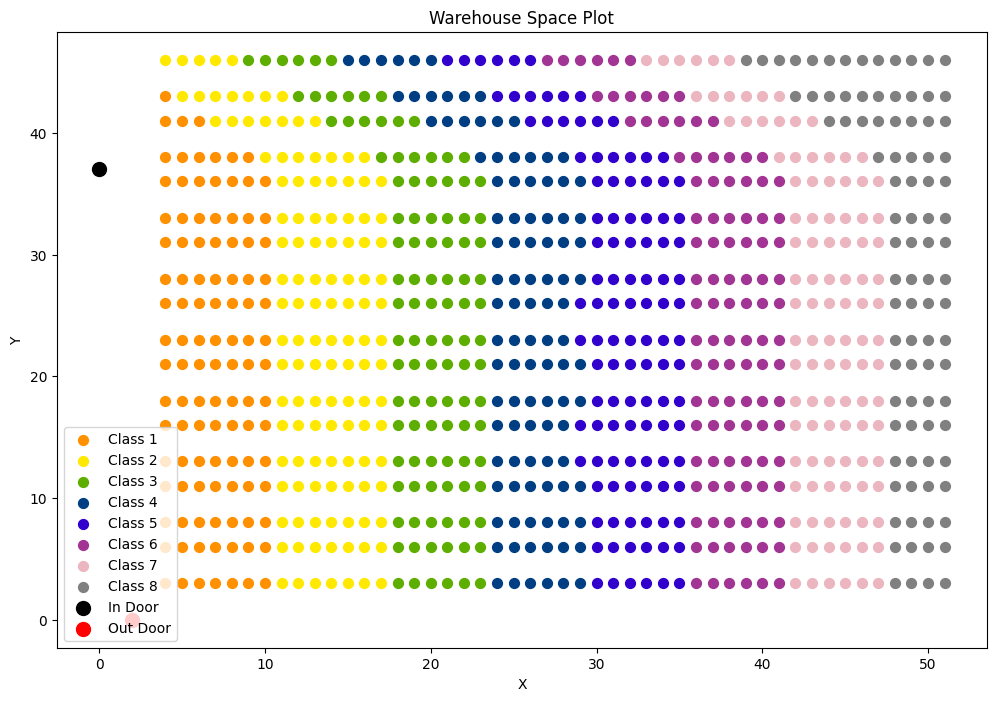

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Set the coordinate for in_door and out_door
in_door = (0, 37)
out_door = (2, 0)

# Set an array to collect all spaces that forklift needs to move to
spaces = []
for row in range(1, 48):
    if row % 5 != 0:
        continue
    for col in range(0, 54):
        if col < 4 or col > 51:
            continue

        x = col
        y_even = row + 1
        y_odd = row - 2

        spaces.append((x, y_odd))
        spaces.append((x, y_even))

# Calculate the distance that forklift needs to move to
distances = []
for space in spaces:
    dist_to_in_door = abs(space[0] - in_door[0]) * (73.125 / 54) + abs(space[1] - in_door[1]) * (65 / 48)
    dist_to_out_door = abs(space[0] - out_door[0]) * (73.125 / 54) + abs(space[1] - out_door[1]) * (65 / 48)
    total_dist = dist_to_in_door + dist_to_out_door
    distances.append((space, total_dist))

# Sort the distances
distances.sort(key=lambda x: x[1])

# And then divide it into 8 classes by percentile
dist_values = [x[1] for x in distances]
percentiles = np.percentile(dist_values, [12.5, 25, 37.5, 50, 62.5, 75, 87.5])
class1 = [x[0] for x in distances if x[1] <= percentiles[0]]
class2 = [x[0] for x in distances if percentiles[0] < x[1] <= percentiles[1]]
class3 = [x[0] for x in distances if percentiles[1] < x[1] <= percentiles[2]]
class4 = [x[0] for x in distances if percentiles[2] < x[1] <= percentiles[3]]
class5 = [x[0] for x in distances if percentiles[3] < x[1] <= percentiles[4]]
class6 = [x[0] for x in distances if percentiles[4] < x[1] <= percentiles[5]]
class7 = [x[0] for x in distances if percentiles[5] < x[1] <= percentiles[6]]
class8 = [x[0] for x in distances if x[1] > percentiles[6]]

# Define the colors for the classes using gradient colormap
cmap = colors.LinearSegmentedColormap.from_list("", ["red", "orange", "yellow", "green", "blue", "purple", "pink", "gray"])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the spaces
ax.scatter([space[0] for space in class1], [space[1] for space in class1], color=cmap(1/8), label='Class 1', s=50)
ax.scatter([space[0] for space in class2], [space[1] for space in class2], color=cmap(2/8), label='Class 2', s=50)
ax.scatter([space[0] for space in class3], [space[1] for space in class3], color=cmap(3/8), label='Class 3', s=50)
ax.scatter([space[0] for space in class4], [space[1] for space in class4], color=cmap(4/8), label='Class 4', s=50)
ax.scatter([space[0] for space in class5], [space[1] for space in class5], color=cmap(5/8), label='Class 5', s=50)
ax.scatter([space[0] for space in class6], [space[1] for space in class6], color=cmap(6/8), label='Class 6', s=50)
ax.scatter([space[0] for space in class7], [space[1] for space in class7], color=cmap(7/8), label='Class 7', s=50)
ax.scatter([space[0] for space in class8], [space[1] for space in class8], color=cmap(8/8), label='Class 8', s=50)

# Plot the in_door and out_door
ax.scatter(in_door[0], in_door[1], color='black', label='In Door', s=100)
ax.scatter(out_door[0], out_door[1], color='red', label='Out Door', s=100)

# Set the title and labels
ax.set_title('Warehouse Space Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add the legend
ax.legend()

# Show the plot
plt.show()

#### **3.2 Calculate the distance from class to in-door and out-door**

we use average distance to estimate s_j & r_j for 8 classes in each

In [ ]:
# calculate average distance to in_door and out_door for each class
class_distances = [class1, class2, class3, class4,class5, class6, class7, class8]

avg_distances = np.zeros((8, 2))  # create a matrix of zeros with shape (8, 2)

for i in range(8):
    distances = class_distances[i]
    total_dist_in = 0
    total_dist_out = 0
    for space in distances:
        dist_to_in_door = abs(space[0] - in_door[0])*(73.125/54) + abs(space[1] - in_door[1])*(65/48)
        dist_to_out_door = abs(space[0] - out_door[0])*(73.125/54) + abs(space[1] - out_door[1])*(65/48)
        total_dist_in += dist_to_in_door
        total_dist_out += dist_to_out_door
    avg_dist_in = total_dist_in / len(distances)
    avg_dist_out = total_dist_out / len(distances)
    avg_distances[i, 0] = avg_dist_in  # assign the average distances to the matrix
    avg_distances[i, 1] = avg_dist_out

print(avg_distances)

[[ 31.13329475  35.52179784]
 [ 37.74193548  47.67977151]
 [ 46.19212963  56.72453704]
 [ 53.984375    64.921875  ]
 [ 62.4609375   72.6171875 ]
 [ 70.56712963  81.09953704]
 [ 78.69212963  89.22453704]
 [ 83.03102355 101.5772192 ]]


In [ ]:
# extract the first column as s
# extract the second column as r
s_j = avg_distances[:, 0]
r_j = avg_distances[:, 1]
# print s_j
print(s_j)
print(r_j)

[31.13329475 37.74193548 46.19212963 53.984375   62.4609375  70.56712963
 78.69212963 83.03102355]
[ 35.52179784  47.67977151  56.72453704  64.921875    72.6171875
  81.09953704  89.22453704 101.5772192 ]


#### **3.3 Calculate the capacity for 8 classes in each:**

we calculare the capacity based on the number of section in each classes and the number of level in each tracks in the warehouse.

the result is shown as below:

In [ ]:
import pandas as pd
Capacity = [502,566,	492,	472,	512,	492,	492	,408]
Class = [1,2,3,4,5,6,7,8]
Capacity_8class = pd.DataFrame({'Class': Class, 'Capacity': Capacity})

print(Capacity_8class)

   Class  Capacity
0      1       502
1      2       566
2      3       492
3      4       472
4      5       512
5      6       492
6      7       492
7      8       408


### **3.4 Evaluate the preformance of LPM method if increasing N**

**Result : Average weekly travel distance for LPM policy is 62642.01** （这是全部的，如果要用前三周算 average需要换一下）

Detailed calculation is shown as below:

In [ ]:
!pip install pulp
import pulp

N = 8
M = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

result_list = []  # create an empty list to store the objective function values

for k in range(18, 52):
    T = [6 * k + 1, 6 * k + 2, 6 * k + 3, 6 * k + 4, 6 * k + 5, 6 * k + 6]

    c_j = [502, 566, 492, 472, 512, 492, 492, 408]

    problem = LpProblem("Warehouse_Optimization", LpMinimize)

    v = LpVariable.dicts("v", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
    w = LpVariable.dicts("w", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
    x = LpVariable.dicts("x", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")

    problem += lpSum(s_j[j] * v[i, j, t] + r_j[j] * w[i, j, t] for i in M for j in range(N) for t in T)

    for i in M:
        for t in T:
            problem += lpSum(v[i, j, t] for j in range(N)) == a_it[i][t]
            problem += lpSum(w[i, j, t] for j in range(N)) == d_it[i][t]

    for i in M:
        for j in range(N):
            for t in T[:-1]:
                problem += v[i, j, t] - w[i, j, t] + x[i, j, t] == x[i, j, t + 1]

    for j in range(N):
        for t in T:
            problem += lpSum(x[i, j, t] + v[i, j, t] for i in M) <= c_j[j]

    problem.solve()

    result_list.append(value(problem.objective))  # append the objective function value to the list

    print(f"Status week{k}: {LpStatus[problem.status]}")
    print("Optimal Solution:", value(problem.objective))

mean_result = sum(result_list) / len(result_list)  # calculate the mean of the objective function values

print(f"Mean of objective function values: {mean_result}")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Status week18: Optimal
Optimal Solution: 63346.057887980416
Status week19: Optimal
Optimal Solution: 64236.237534806656
Status week20: Optimal
Optimal Solution: 65120.85067393173
Status week21: Optimal
Optimal Solution: 65314.205369252
Status week22: Optimal
Optimal Solution: 66622.01885807041
Status week23: Optimal
Optimal Solution: 65682.6528890951
Status week24: Optimal
Optimal Solution: 65240.32528957113
Status week25: Optimal
Optimal Solution: 64279.72709200866
Status week26: Optimal
Optimal Solution: 63689.76525561984
Status week27: Optimal
Optimal Solution: 65656.18874675501
Status week28: Optimal
Optimal Solution: 66411.3550057249
Status week29: Optimal
Optimal Solution: 66725.52625959596
Status week30: Optimal
Optimal Solution: 65598.71874183555
Status week31: Optimal
Optimal Solution: 65039.08826334086
Status week32: Optimal
Optimal Solution: 65356.316991010994
Status week33: Op

In [ ]:

mean_result = sum(result_list[:3]) / 3  # calculate the mean of the first three objective function values

print(f"Mean of the first three objective function values: {mean_result}")

Mean of the first three objective function values: 64234.382032239606


### **3.5 Evaluate the preformance of TOS if increasing N**

**Result : Average weekly travel distance for TOS policy is 21384 649464269998**

Detailed calculation is shown as below:

In [ ]:
# Week 17
# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_filtered = df_merged[(df_merged['day'] <= 96) & (df_merged['product'].isin(desired_products))].copy()

# Calculate the cumulative sum of inbound and outbound for each product
df_filtered['cum_inbound'] = df_filtered.groupby('product')['inbound'].cumsum()
df_filtered['cum_outbound'] = df_filtered.groupby('product')['outbound'].cumsum()

# Get the cumulative inbound and outbound amounts for each product at Day 96
cumulative_amounts = df_filtered[df_filtered['day'] < 97].groupby('product')[['cum_inbound', 'cum_outbound']].last().reset_index()

# Set the initial inventory values based on the updated table
initial_inventory = pd.DataFrame({'product': [1, 2, 3, 4, 5, 7, 9, 10, 11, 12],
                                  'min_initial_inventory': [115.0, 188.0, 4035.0, 0.0, 245.0, 3022.0, 0.0, 2590.0, 0.0, 2657.0]})

# Merge the initial_inventory DataFrame with the cumulative_amounts DataFrame
inventory_df = pd.merge(initial_inventory, cumulative_amounts, on='product')

# Calculate the inventory at the start of Day 97 for each product
inventory_df['inventory_day_97'] = inventory_df['min_initial_inventory'] + inventory_df['cum_inbound'] - inventory_df['cum_outbound']

#print(inventory_df[['product', 'inventory_day_97']])
inventory_df = inventory_df[(inventory_df['product'].isin(desired_products))]

inventory_df

,product,min_initial_inventory,cum_inbound,cum_outbound,inventory_day_97
0,1,115.0,1715.0,1600.0,230.0
1,2,188.0,615.0,724.0,79.0
2,3,4035.0,0.0,1423.0,2612.0
3,4,0.0,1271.0,0.0,1271.0
4,5,245.0,468.0,562.0,151.0
5,7,3022.0,53.0,962.0,2113.0
6,9,0.0,1035.0,71.0,964.0
7,10,2590.0,12.0,956.0,1646.0
8,11,0.0,884.0,35.0,849.0
9,12,2657.0,0.0,904.0,1753.0


In [ ]:
#get the initial inventory for week 17
# Assuming inventory_df is already created
inventory_i = np.zeros(20)

for i in range(20):
    if i in inventory_df['product'].values:
        inventory_i[i] = inventory_df.loc[inventory_df['product'] == i, 'inventory_day_97'].values[0]
    else:
        inventory_i[i] = 0

print(inventory_i)

[   0.  230.   79. 2612. 1271.  151.    0. 2113.    0.  964. 1646.  849.
 1753.    0.    0.    0.    0.    0.    0.    0.]


In [ ]:

#calculate the turnover rate for selected top 10 product
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

for i in range(20):
    for t in range(7):
        day = t + 97
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 97:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
            turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
            turnover_rates[i].append(turnover_rate)
        else:
            starting_inv[i][t] = 0

    avg_turnover_rates = sum(turnover_rates[i]) / 6
    product_weekly_turnover_rates.append(avg_turnover_rates)
    print(f"product ({i}): {avg_turnover_rates}")

product (0): 0.0
product (1): 0.6005271633757749
product (2): 0.16649504322946654
product (3): 0.003890823700584689
product (4): 0.003088803088803089
product (5): 0.11382310701728321
product (6): 0.0
product (7): 0.0057375676029401
product (8): 0.0
product (9): 0.016652448341825356
product (10): 0.018929641381584
product (11): 0.0003935458480913026
product (12): 0.007070320681761703
product (13): 0.0
product (14): 0.0
product (15): 0.0
product (16): 0.0
product (17): 0.0
product (18): 0.0
product (19): 0.0


In [ ]:
# Input data
# s_j, r_j
warehouse_data = np.array([
 [ 31.13329475,  35.52179784],
 [ 37.74193548,  47.67977151],
 [ 46.19212963,  56.72453704],
 [ 53.984375,    64.921875  ],
 [ 62.4609375,   72.6171875 ],
 [ 70.56712963,  81.09953704],
 [ 78.69212963,  89.22453704],
 [ 83.03102355, 101.5772192 ]])
selected_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
turnover_rates = [product_weekly_turnover_rates[i] for i in selected_products]
turnover_rates

[0.6005271633757749,
 0.003890823700584689,
 0.16649504322946654,
 0.003088803088803089,
 0.016652448341825356,
 0.11382310701728321,
 0.0057375676029401,
 0.018929641381584,
 0.0003935458480913026,
 0.007070320681761703]

In [ ]:
# Assign selected products to the four classes based on turnover rates
class_indices = np.argsort(turnover_rates)[::-1] // 2
class_indices

array([0, 1, 2, 3, 2, 4, 3, 0, 1, 4])

In [ ]:
# Find the cumulative inbound and outbound in week 17
# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_week17 = df_merged[(df_merged['day'] >=97) & (df_merged['day'] < 103) & (df_merged['product'].isin(desired_products))].copy()

# Aggregate the daily data into the total inbound and outbound of each product
total_data = df_week17.groupby('product').agg({'inbound': 'sum', 'outbound': 'sum'}).reset_index()

print(total_data)

   product  inbound  outbound
0        1    181.0     208.0
1        2     22.0      39.0
2        3      0.0      60.0
3        4     24.0       0.0
4        5     55.0      47.0
5        7      0.0      71.0
6        9    101.0       3.0
7       10      0.0     172.0
8       11      0.0       2.0
9       12      0.0      72.0


In [ ]:
# Calculate the average weekly travel distance
avg_travel_distances = np.zeros(8)
num_products_in_class = np.zeros(8)

for idx, class_idx in enumerate(class_indices):

    avg_travel_distances[class_idx] += (
        warehouse_data[class_idx][0]*total_data.iloc[idx,1] + warehouse_data[class_idx][1]*total_data.iloc[idx,2]
    )
    num_products_in_class[class_idx] += 1

avg_travel_distances /= num_products_in_class

<ipython-input-88-ba35751f7e31>:12: RuntimeWarning: invalid value encountered in true_divide
  avg_travel_distances /= num_products_in_class


In [ ]:
print(" 17th week travel distances for the selected products by class:")
for i, distance in enumerate(avg_travel_distances):
    print(f"Class {i + 1}: {distance:.2f}")

 17th week travel distances for the selected products by class:
Class 1: 9566.70
Class 2: 1392.60
Class 3: 4305.05
Class 4: 3471.41
Class 5: 5192.13
Class 6: nan
Class 7: nan
Class 8: nan


In [ ]:
# Calculate the sum of travel distances
sum_travel_distances = sum(avg_travel_distances[:4])
print("Sum of travel distances:", sum_travel_distances)

Sum of travel distances: 18735.753917175


In [ ]:
# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]

# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_filtered = df_merged[(df_merged['day'] <= 102) & (df_merged['product'].isin(desired_products))].copy()

# Calculate the cumulative sum of inbound and outbound for each product
df_filtered['cum_inbound'] = df_filtered.groupby('product')['inbound'].cumsum()
df_filtered['cum_outbound'] = df_filtered.groupby('product')['outbound'].cumsum()

# Get the cumulative inbound and outbound amounts for each product at Day 96
cumulative_amounts = df_filtered[df_filtered['day'] <= 102].groupby('product')[['cum_inbound', 'cum_outbound']].last().reset_index()

# Set the initial inventory values based on the updated table
initial_inventory = pd.DataFrame({'product': [1, 2, 3, 4, 5, 7, 9, 10, 11, 12],
                                  'min_initial_inventory': [115.0, 188.0, 4035.0, 0.0, 245.0, 3022.0, 0.0, 2590.0, 0.0, 2657.0]})

# Merge the initial_inventory DataFrame with the cumulative_amounts DataFrame
inventory_df = pd.merge(initial_inventory, cumulative_amounts, on='product')

# Calculate the inventory at the start of Day 97 for each product
inventory_df['inventory_day_102'] = inventory_df['min_initial_inventory'] + inventory_df['cum_inbound'] - inventory_df['cum_outbound']

#print(inventory_df[['product', 'inventory_day_97']])
inventory_df = inventory_df[(inventory_df['product'].isin(desired_products))]

inventory_df

,product,min_initial_inventory,cum_inbound,cum_outbound,inventory_day_102
0,1,115.0,1896.0,1808.0,203.0
1,2,188.0,637.0,763.0,62.0
2,3,4035.0,0.0,1483.0,2552.0
3,4,0.0,1295.0,0.0,1295.0
4,5,245.0,523.0,609.0,159.0
5,7,3022.0,53.0,1033.0,2042.0
6,9,0.0,1136.0,74.0,1062.0
7,10,2590.0,12.0,1128.0,1474.0
8,11,0.0,884.0,37.0,847.0
9,12,2657.0,0.0,976.0,1681.0


In [ ]:
#get the initial inventory for week 18
# Assuming inventory_df is already created
inventory_i = np.zeros(20)

for i in range(20):
    if i in inventory_df['product'].values:
        inventory_i[i] = inventory_df.loc[inventory_df['product'] == i, 'inventory_day_102'].values[0]
    else:
        inventory_i[i] = 0

print(inventory_i)

[   0.  203.   62. 2552. 1295.  159.    0. 2042.    0. 1062. 1474.  847.
 1681.    0.    0.    0.    0.    0.    0.    0.]


In [ ]:

#calculate the turnover rate for selected top 10 product
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

for i in range(20):
    for t in range(7):
        day = t + 103
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 103:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
            turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
            turnover_rates[i].append(turnover_rate)
        else:
            starting_inv[i][t] = 0

    avg_turnover_rates = sum(turnover_rates[i]) / 6
    product_weekly_turnover_rates.append(avg_turnover_rates)
    print(f"product ({i}): {avg_turnover_rates}")

product (0): 0.0
product (1): 0.8840438460297183
product (2): 0.2325466443887496
product (3): 0.00398382779119051
product (4): 0.003032600454890068
product (5): 0.10798557596480739
product (6): 0.0
product (7): 0.005942153752586357
product (8): 0.0
product (9): 0.015219187779064816
product (10): 0.02135662521817455
product (11): 0.0003944773175542406
product (12): 0.007383561814041224
product (13): 0.0
product (14): 0.0
product (15): 0.0
product (16): 0.0
product (17): 0.0
product (18): 0.0
product (19): 0.0


In [ ]:
# Input data
# s_j, r_j
warehouse_data = np.array([
 [ 31.13329475,  35.52179784],
 [ 37.74193548,  47.67977151],
 [ 46.19212963,  56.72453704],
 [ 53.984375,    64.921875  ],
 [ 62.4609375,   72.6171875 ],
 [ 70.56712963,  81.09953704],
 [ 78.69212963,  89.22453704],
 [ 83.03102355, 101.5772192 ]])
selected_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12]
turnover_rates = [product_weekly_turnover_rates[i] for i in selected_products]
turnover_rates

[0.8840438460297183,
 0.00398382779119051,
 0.2325466443887496,
 0.003032600454890068,
 0.015219187779064816,
 0.10798557596480739,
 0.005942153752586357,
 0.02135662521817455,
 0.0003944773175542406,
 0.007383561814041224]

In [ ]:
# Assign selected products to the four classes based on turnover rates
class_indices = np.argsort(turnover_rates)[::-1] // 2
class_indices

array([0, 1, 2, 3, 2, 4, 3, 0, 1, 4])

In [ ]:
# Find the cumulative inbound and outbound in week 17
# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_week18 = df_merged[(df_merged['day'] >=103) & (df_merged['day'] < 109) & (df_merged['product'].isin(selected_products))].copy()

# Aggregte the daily data into the total inbound and outbound of each product
total_data = df_week18.groupby('product').agg({'inbound': 'sum', 'outbound': 'sum'}).reset_index()

print(total_data)

   product  inbound  outbound
0        1    163.0     189.0
1        2     72.0      65.0
2        3      0.0      84.0
3        4    205.0       0.0
4        5     58.0      65.0
5        7      0.0      59.0
6        9    151.0       1.0
7       11      0.0       1.0
8       12      0.0      58.0


In [ ]:
# Create a new DataFrame with the row you want to add
new_row = pd.DataFrame({'product': [10], 'inbound': [0], 'outbound': [0]})

# Append the new row to the original DataFrame
total_data = total_data.append(new_row, ignore_index=True)

# Reorder the DataFrame to move the new row to the desired index (7 in this case)
total_data = total_data.sort_values(by='product').reset_index(drop=True)

print(total_data)

   product  inbound  outbound
0        1    163.0     189.0
1        2     72.0      65.0
2        3      0.0      84.0
3        4    205.0       0.0
4        5     58.0      65.0
5        7      0.0      59.0
6        9    151.0       1.0
7       10      0.0       0.0
8       11      0.0       1.0
9       12      0.0      58.0


<ipython-input-99-3d2a1ffaf27d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(new_row, ignore_index=True)


In [ ]:
# Calculate the average weekly travel distance
avg_travel_distances = np.zeros(8)
num_products_in_class = np.zeros(8)

for idx, class_idx in enumerate(class_indices):

    avg_travel_distances[class_idx] += (
        warehouse_data[class_idx][0]*total_data.iloc[idx,1] + warehouse_data[class_idx][1]*total_data.iloc[idx,2]
    )
    num_products_in_class[class_idx] += 1

avg_travel_distances /= num_products_in_class

<ipython-input-100-ba35751f7e31>:12: RuntimeWarning: invalid value encountered in true_divide
  avg_travel_distances /= num_products_in_class


In [ ]:
print(" 17th week travel distances for the selected products by class:")
for i, distance in enumerate(avg_travel_distances):
    print(f"Class {i + 1}: {distance:.2f}")

 17th week travel distances for the selected products by class:
Class 1: 5894.17
Class 2: 2932.14
Class 3: 5565.55
Class 4: 9641.68
Class 5: 4248.11
Class 6: nan
Class 7: nan
Class 8: nan


In [ ]:
# Calculate the sum of travel distances
sum_travel_distances = sum(avg_travel_distances[:4])
print("Sum of travel distances:", sum_travel_distances)

Sum of travel distances: 24033.545011365


In [ ]:
## Calculate the avg of week 17&18
(18735.753917175+24033.545011365)/2

21384.649464269998

## **Question 4 ：For Ouestion (2), what was the performance of each policy if the number of products M increased?**

**Answer**

Based on our calculation shown below, increasing the number of Product M would increase the travel distance of the policy.(eg. when M is increased from 10 to 15, Average weekly travel distance for LPM policy is increased from 60791.48 to 81165.67)

### **we increase M from 10 to 15**

**4.1 Calculate flow rate to select Top 15 product**

I calculate the flow amount for the first 16 weeks to pick up the **top 15** product (we need to predict later) that has the largest flow amount. And use these 15 products to forecast the optimized distance.

In [ ]:
#Then merge two xlsx files using outer join on 'day' and 'product'
df_merged = pd.merge(df_inbound, df_outbound, on=['day', 'product'], how='outer')

# Fill NaN values with 0
df_merged.fillna(0, inplace=True)

# Sort the merged dataframe by 'day' and 'product'
df_merged.sort_values(['day', 'product'], inplace=True)

# Reset the index
df_merged.reset_index(drop=True, inplace=True)

# group the data by day and product, and calculate the sum of inbound and outbound amounts
df_flow = df_merged.groupby(['day', 'product'])['inbound', 'outbound'].sum()

# calculate the flow amount by adding inbound and outbound amounts
df_flow['flow_amount'] = df_flow['inbound'] + df_flow['outbound']

# filter the data for the first 16 weeks
df_flow_16weeks = df_flow[df_flow.index.get_level_values('day') <= 96]

# calculate the average flow amount for each product and sort by descending order
df_ranked = df_flow_16weeks.groupby('product')['flow_amount'].sum().sort_values(ascending=False)
df_ranked.head(15)

<ipython-input-143-d05e509a5fea>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_flow = df_merged.groupby(['day', 'product'])['inbound', 'outbound'].sum()


product
1     3315.0
3     1423.0
2     1339.0
4     1271.0
9     1106.0
5     1030.0
7     1015.0
10     968.0
11     919.0
12     904.0
8      861.0
16     861.0
14     821.0
6      717.0
13     630.0
Name: flow_amount, dtype: float64

Here, we can see the top 10 flow amount products are 1,3,2,4,9,5,7,10,11,12,8,16,14,6,13

In [ ]:
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12,8,16,14,6,13]
filtered_data15 = df_merged[df_merged['product'].isin(desired_products)]

**4.2 Estimate the minimum initial inventory for Top 15 prodcut**

In [ ]:
filtered_data15 = df_merged[df_merged['product'].isin(desired_products)].copy()
# Calculate the cumulative sum of inbound and outbound for each product
filtered_data15['cum_inbound'] = filtered_data15.groupby('product')['inbound'].cumsum()
filtered_data15['cum_outbound'] = filtered_data15.groupby('product')['outbound'].cumsum()

# Calculate the difference between cumulative inbound and outbound
filtered_data15['difference'] = filtered_data15['cum_inbound'] - filtered_data15['cum_outbound']

# Find the minimum difference for each product
min_difference = filtered_data15.groupby('product')['difference'].min().reset_index()

# If the minimum difference is negative, take its absolute value as the minimum initial inventory required
min_difference['min_initial_inventory'] = min_difference['difference'].apply(lambda x: abs(x) if x < 0 else 0)

print(min_difference[['product', 'min_initial_inventory']])

    product  min_initial_inventory
0         1                  115.0
1         2                  188.0
2         3                 4035.0
3         4                    0.0
4         5                  245.0
5         6                 1818.0
6         7                 3022.0
7         8                    0.0
8         9                    0.0
9        10                 2590.0
10       11                    0.0
11       12                 2657.0
12       13                    1.0
13       14                 2526.0
14       16                  108.0


**4.3 Using Moving Average to forecast demand**

In [ ]:
df_merged_desired = df_merged[df_merged['product'].isin(desired_products)].copy()
df_merged_desired_16weeks = df_merged_desired[df_merged_desired['day']<=96]

In [ ]:
all_results = []
for i in range (17,52):
  start_day = i*6 +1
  end_day = i*6 +6
  moving_average_days = 96

  filtered_df = df_merged_desired[df_merged_desired['product'].isin(products_to_select)].copy()

  filtered_df['inbound_ma'] = filtered_df.groupby('product')['inbound'].transform(lambda x: x.rolling(window=moving_average_days, min_periods=1).mean())
  filtered_df['outbound_ma'] = filtered_df.groupby('product')['outbound'].transform(lambda x: x.rolling(window=moving_average_days, min_periods=1).mean())

  results = []
  for product in products_to_select:
      product_data = filtered_df[filtered_df['product'] == product]

      for day in range(start_day, end_day + 1):
          lower_bound = day - 96
          upper_bound = day - 1
          product_data_filtered = product_data[(product_data['day'] >= lower_bound) & (product_data['day'] <= upper_bound)]

          average_inbound = product_data_filtered['inbound'].mean()
          average_outbound = product_data_filtered['outbound'].mean()
          results.append({'day': day, 'product': product, 'inbound': average_inbound,'outbound': average_outbound})

  result_df = pd.DataFrame(results)
  all_results.append(result_df)

final_result_df = pd.concat(all_results, ignore_index=True)
#print(final_result_df)

concatenated_df = pd.concat([df_merged_desired_16weeks, final_result_df], ignore_index=True)
print(concatenated_df)

      day  product  inbound   outbound
0       1        1     18.0   0.000000
1       1        3      0.0  10.000000
2       1        4      1.0   0.000000
3       1        5     55.0   0.000000
4       1        7     17.0  10.000000
...   ...      ...      ...        ...
2883  308       12      0.0  11.344262
2884  309       12      0.0  11.344262
2885  310       12      0.0  11.344262
2886  311       12      0.0  11.433333
2887  312       12      0.0  11.423729

[2888 rows x 4 columns]


**4.4 Preformance of LPM if increasing M**


**Result : Average weekly travel distance for LPM policy is 81165.67** 

Detailed calculation is shown as below:

In [ ]:
# Create an empty numpy array to store the values of a_it
a_it = np.zeros((20, 313))
d_it = np.zeros((20, 313))

# Loop through each product and day and get the corresponding value of a_it
for i in range(20):
    for t in range(97,313):
        day = t
        if i in concatenated_df['product'].values:
            inbound_values = concatenated_df.loc[(concatenated_df['product'] == i) & (concatenated_df['day'] == day), 'inbound'].values
            if len(inbound_values) > 0:
                a_it[i][t] = inbound_values[0]
            else:
                a_it[i][t] = 0
        else:
            a_it[i][t] = 0
        

for i in range(20):
    for t in range(97,313):
        day = t
        if i in concatenated_df['product'].values:
            outbound_values = concatenated_df.loc[(concatenated_df['product'] == i) & (concatenated_df['day'] == day), 'outbound'].values
            if len(outbound_values) > 0:
                d_it[i][t] = outbound_values[0]
            else:
                d_it[i][t] = 0
        else:
            d_it[i][t] = 0

In [ ]:
!pip install pulp
import pulp

N = 4
M = desired_products

result_list = []

for k in range(18,52):
#M = products_to_select

  T = [6*k+1, 6*k+2, 6*k+3, 6*k+4, 6*k+5, 6*k+6]

  # capacity c
  c_j = [1068, 964, 1004, 900]

  # Define the problem
  problem = pulp.LpProblem("Warehouse_Optimization", pulp.LpMinimize)

  # Define decision variables
  v = pulp.LpVariable.dicts("v", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
  w = pulp.LpVariable.dicts("w", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")
  x = pulp.LpVariable.dicts("x", ((i, j, t) for i in M for j in range(N) for t in T), lowBound=0, cat="Continuous")

  # Define objective function
  problem += pulp.lpSum(s_j[j] * v[i, j, t] + r_j[j] * w[i, j, t] for i in M for j in range(N) for t in T)

  # Add constraints
  for i in M:
      for t in T:
          problem += pulp.lpSum(v[i, j, t] for j in range(N)) == a_it[i][t]  # constraint 1
          problem += pulp.lpSum(w[i, j, t] for j in range(N)) == d_it[i][t]  # constraint 2

  for i in M:
      for j in range(N):
          for t in T[:-1]:
              problem += v[i, j, t] - w[i, j, t] + x[i, j, t] == x[i, j, t + 1]  # constraint 3

  for j in range(N):
      for t in T:
          problem += pulp.lpSum(x[i, j, t] + v[i, j, t] for i in M) <= c_j[j]  # constraint 4

  # Solve the problem
  problem.solve()

  result_list.append(value(problem.objective))

  # Print the results
  print(f"Status week{k}: {pulp.LpStatus[problem.status]}")
  print("Optimal Solution:", pulp.value(problem.objective))

mean_result = sum(result_list) / len(result_list)

print(f"Mean of objective function values: {mean_result}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Status week18: Optimal
Optimal Solution: 70279.3494125498
Status week19: Optimal
Optimal Solution: 71231.07365518477
Status week20: Optimal
Optimal Solution: 72079.53503147647
Status week21: Optimal
Optimal Solution: 72237.13779395743
Status week22: Optimal
Optimal Solution: 73503.02127142002
Status week23: Optimal
Optimal Solution: 72674.66147851705
Status week24: Optimal
Optimal Solution: 72366.0865585815
Status week25: Optimal
Optimal Solution: 71600.08370586905
Status week26: Optimal
Optimal Solution: 71199.8336863832
Status week27: Optimal
Optimal Solution: 73136.68001496163
Status week28: Optimal
Optimal Solution: 73877.82756154954
Status week29: Optimal
Optimal Solution: 74110.78349899521
Status week30: Optimal
Optimal Solution: 73188.8272334551
Status week31: Optimal
Optimal Solution: 72741.61509082222
Status week32: Optimal
Optimal Solution: 72966.75483763272
Status week33: Optim


**4.5 Preformance of TOS if increasing M**

**17th week**

In [ ]:
# Create an empty numpy array to store the values of a_it
a_it = np.zeros((20, 313))
d_it = np.zeros((20, 313))

# Loop through each product and day and get the corresponding value of a_it
for i in range(20):
    for t in range(97,313):
        day = t
        if i in concatenated_df['product'].values:
            inbound_values = concatenated_df.loc[(concatenated_df['product'] == i) & (concatenated_df['day'] == day), 'inbound'].values
            if len(inbound_values) > 0:
                a_it[i][t] = inbound_values[0]
            else:
                a_it[i][t] = 0
        else:
            a_it[i][t] = 0
        

for i in range(20):
    for t in range(97,313):
        day = t
        if i in concatenated_df['product'].values:
            outbound_values = concatenated_df.loc[(concatenated_df['product'] == i) & (concatenated_df['day'] == day), 'outbound'].values
            if len(outbound_values) > 0:
                d_it[i][t] = outbound_values[0]
            else:
                d_it[i][t] = 0
        else:
            d_it[i][t] = 0

In [ ]:
# List of desired products
desired_products = [1, 3, 2, 4, 9, 5, 7, 10, 11, 12,8,16,14,6,13]

# Filter the DataFrame to include only rows with day <= 96 and the desired products, then create a new DataFrame
df_filtered = df_merged[(df_merged['day'] <= 96) & (df_merged['product'].isin(desired_products))].copy()

# Calculate the cumulative sum of inbound and outbound for each product
df_filtered['cum_inbound'] = df_filtered.groupby('product')['inbound'].cumsum()
df_filtered['cum_outbound'] = df_filtered.groupby('product')['outbound'].cumsum()

# Get the cumulative inbound and outbound amounts for each product at Day 96
cumulative_amounts = df_filtered[df_filtered['day'] < 97].groupby('product')[['cum_inbound', 'cum_outbound']].last().reset_index()

# Set the initial inventory values based on the updated table
initial_inventory = pd.DataFrame({'product': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16],
                                  'min_initial_inventory': [115.0,188.0,4035.0,0.0,245.0,1818.0,3022.0,0.0, 0.0,2590.0,0.0,2657.0,1.0,2526.0,108.0]})

# Merge the initial_inventory DataFrame with the cumulative_amounts DataFrame
inventory_df = pd.merge(initial_inventory, cumulative_amounts, on='product')

# Calculate the inventory at the start of Day 97 for each product
inventory_df['inventory_day_97'] = inventory_df['min_initial_inventory'] + inventory_df['cum_inbound'] - inventory_df['cum_outbound']

#print(inventory_df[['product', 'inventory_day_97']])
inventory_df = inventory_df[(inventory_df['product'].isin(desired_products))]

inventory_df

,product,min_initial_inventory,cum_inbound,cum_outbound,inventory_day_97
0,1,115.0,1715.0,1600.0,230.0
1,2,188.0,615.0,724.0,79.0
2,3,4035.0,0.0,1423.0,2612.0
3,4,0.0,1271.0,0.0,1271.0
4,5,245.0,468.0,562.0,151.0
5,6,1818.0,148.0,569.0,1397.0
6,7,3022.0,53.0,962.0,2113.0
7,8,0.0,860.0,1.0,859.0
8,9,0.0,1035.0,71.0,964.0
9,10,2590.0,12.0,956.0,1646.0


In [ ]:
#get the initial inventory for week 17
# Assuming inventory_df is already created
inventory_i = np.zeros(20)

for i in range(20):
    if i in inventory_df['product'].values:
        inventory_i[i] = inventory_df.loc[inventory_df['product'] == i, 'inventory_day_97'].values[0]
    else:
        inventory_i[i] = 0

print(inventory_i)

[   0.  230.   79. 2612. 1271.  151. 1397. 2113.  859.  964. 1646.  849.
 1753.  617. 1713.    0.  177.    0.    0.    0.]


In [ ]:
#calculate the turnover rate for selected top 15 product
turnover_rates = [[] for _ in range(20)]
product_weekly_turnover_rates = []
starting_inv = np.zeros((20, 7))

#starting_inv=[[] for _ in range(19)]
for i in range(20):
    for t in range(7):
        day = t + 97
        if i in inventory_df['product'].values:
            # Calculate starting inventory for the day
            if day == 97:
                starting_inv[i][t] = inventory_i[i]
                
            else:
                starting_inv[i][t] = starting_inv[i][t-1] + a_it[i][t] - d_it[i][t]
            
            #starting_inv[i][t].append(starting_inv)
            
            turnover_rate = (a_it[i][t] + d_it[i][t]) / starting_inv[i][t]
            turnover_rates[i].append(turnover_rate)
        else:
            starting_inv[i][t] = 0
        
        #print(starting_inv)
      
    avg_turnover_rates = sum(turnover_rates[i]) / 6
    product_weekly_turnover_rates.append(avg_turnover_rates)
    print(f"product ({i}): {avg_turnover_rates}")

# Task Scheduling 10 pts

### 1. Formulate this problem as an LP. Clearly indicate your decision variables, your objective function, and your constraints

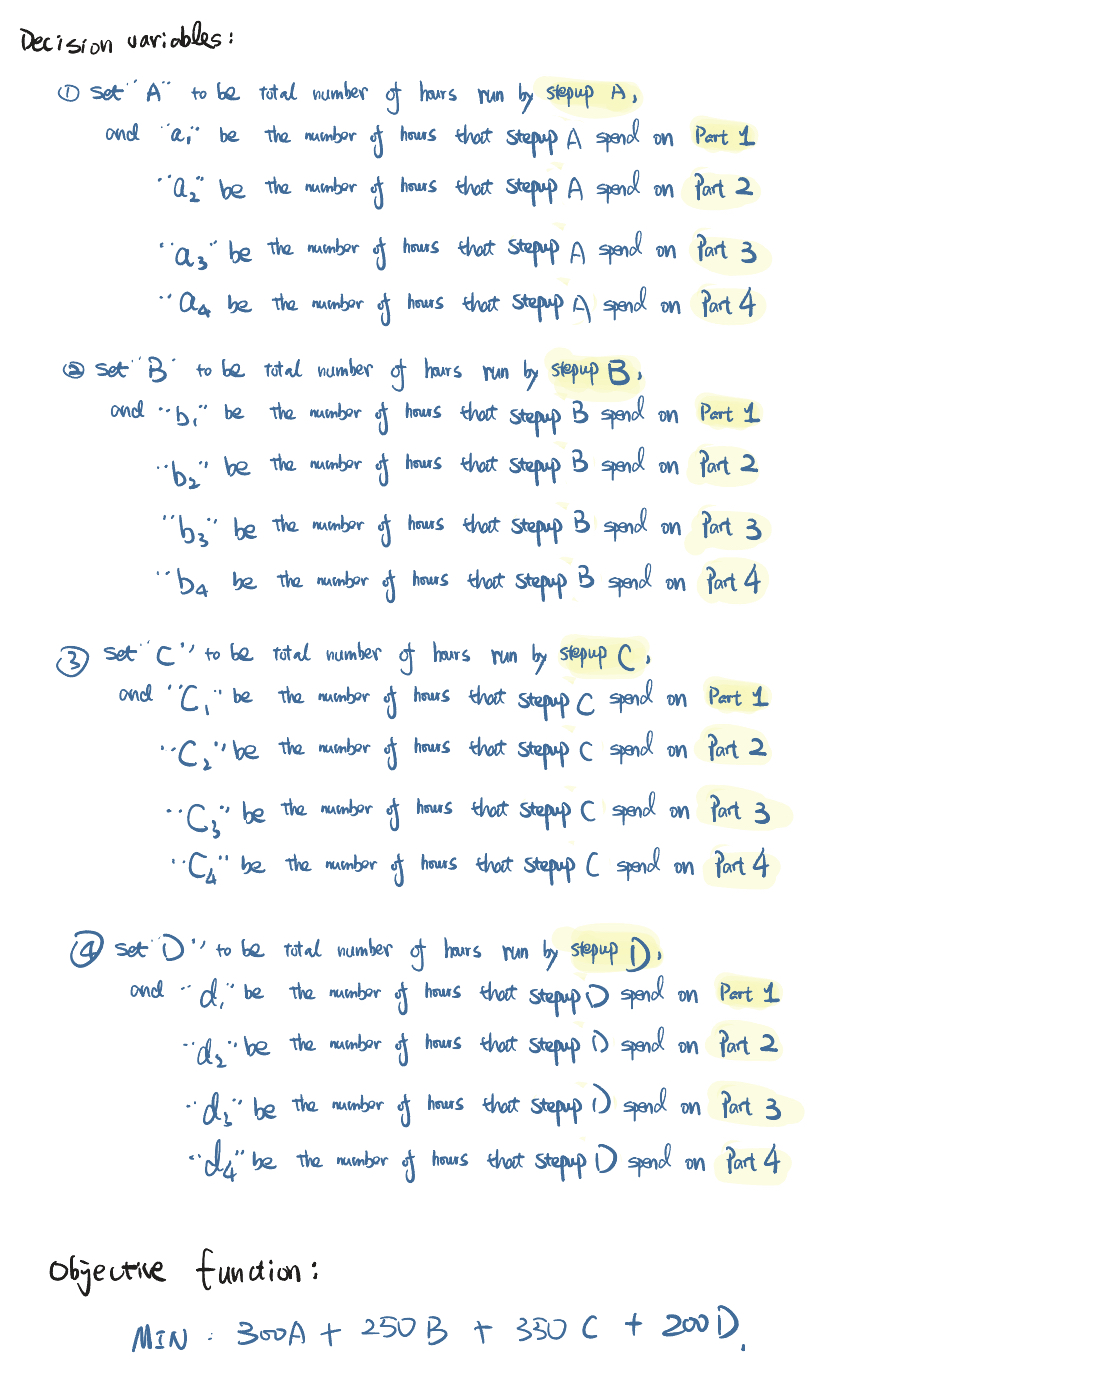

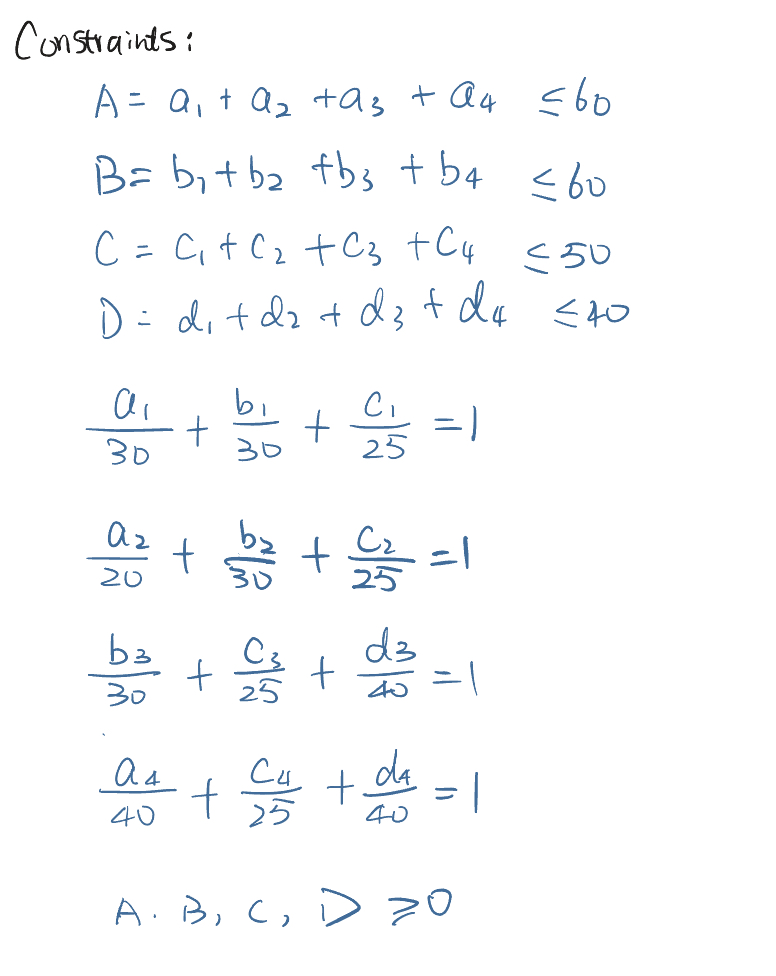

### 2. Solve this in Pyomo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.11.4+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.108.6+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-2_amd64.deb ...
Unpacking coinor-libcgl1 (0.60.3+repack1-2) ...
Selecting previously unselecte

In [ ]:
model = ConcreteModel()

# declare decision variables

#the number of hours than steup A spend on each part
model.a1 = Var(domain=NonNegativeReals) #part1
model.a2 = Var(domain=NonNegativeReals) #part2
model.a3 = Var(domain=NonNegativeReals) #part3
model.a4 = Var(domain=NonNegativeReals) #part4

#the number of hours than steup B spend on each part
model.b1 = Var(domain=NonNegativeReals)  #part1
model.b2 = Var(domain=NonNegativeReals)  #part2
model.b3 = Var(domain=NonNegativeReals)  #part3
model.b4 = Var(domain=NonNegativeReals)  #part4

#the number of hours than steup C spend on each part
model.c1 = Var(domain=NonNegativeReals)  #part1
model.c2 = Var(domain=NonNegativeReals)  #part2
model.c3 = Var(domain=NonNegativeReals)  #part3
model.c4 = Var(domain=NonNegativeReals)  #part4

#the number of hours than steup D spend on each part
model.d1 = Var(domain=NonNegativeReals)  #part1
model.d2 = Var(domain=NonNegativeReals)  #part2
model.d3 = Var(domain=NonNegativeReals)  #part3
model.d4 = Var(domain=NonNegativeReals)  #part4

# declare objective

model.cost = Objective(
    expr = 300*(model.a1+ model.a2+ model.a3+ model.a4) + 250*(model.b1+ model.b2+ model.b3+ model.b4) + 350*(model.c1+ model.c2+ model.c3+ model.c4) + 200*(model.d1+ model.d2+ model.d3+ model.d4),
    sense = minimize)

# declare constraints

model.steupA = Constraint(expr = (model.a1+ model.a2+ model.a3+ model.a4) <= 60)
model.steupB = Constraint(expr = (model.b1+ model.b2+ model.b3+ model.b4) <= 60)
model.steupC = Constraint(expr = (model.c1+ model.c2+ model.c3+ model.c4) <= 50)
model.steupD = Constraint(expr = (model.d1+ model.d2+ model.d3+ model.d4) <= 40)

model.part1 = Constraint(expr = ((model.a1/30)+ (model.b1/30)+ (model.c1/25)) == 1)
model.part2 = Constraint(expr = ((model.a2/20)+ (model.b2/30)+ (model.c2/25)) == 1)
model.part3 = Constraint(expr = ((model.b3/30)+ (model.c3/25)+ (model.d3/40)) == 1)
model.part4 = Constraint(expr = ((model.a4/40)+ (model.c4/25)+ (model.d4/40)) == 1)

# solve
SolverFactory('cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 29000.0
  Upper bound: 29000.0
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 17
  Number of nonzeros: 12
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of creat

In [ ]:
model.cost.display()
model.a3.display()

cost : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 29000.0
a3 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals


In [ ]:
print(f"Minimum Cost = {model.cost()}")

Minimum Cost = 29000.0


In [ ]:
#the number of hours than steup A spend on each part
print(f" the number of hours that setup A spend on each part: ")
print(f" the number of hours setup A spend on part 1 is {model.a1()} ")
print(f" the number of hours setup A spend on part 2 is {model.a2()} ")
print(f" the number of hours setup A spend on part 3 is {model.a3()} ")
print(f" the number of hours setup A spend on part 4 is {model.a4()} ")
print(f" =============================================================== ")
print(f" the number of hours that setup B spend on each part: ")
print(f" the number of hours setup B spend on part 1 is {model.b1()} ")
print(f" the number of hours setup B spend on part 2 is {model.b2()} ")
print(f" the number of hours setup B spend on part 3 is {model.b3()} ")
print(f" the number of hours setup B spend on part 4 is {model.b4()} ")
print(f" =============================================================== ")
print(f" the number of hours that setup C spend on each part: ")
print(f" the number of hours setup C spend on part 1 is {model.c1()} ")
print(f" the number of hours setup C spend on part 2 is {model.c2()} ")
print(f" the number of hours setup C spend on part 3 is {model.c3()} ")
print(f" the number of hours setup C spend on part 4 is {model.c4()} ")
print(f" =============================================================== ")
print(f" the number of hours that setup D spend on each part: ")
print(f" the number of hours setup D spend on part 1 is {model.d1()} ")
print(f" the number of hours setup D spend on part 2 is {model.d2()} ")
print(f" the number of hours setup D spend on part 3 is {model.d3()} ")
print(f" the number of hours setup D spend on part 4 is {model.d4()} ")

 the number of hours that setup A spend on each part: 
 the number of hours setup A spend on part 1 is 0.0 
 the number of hours setup A spend on part 2 is 20.0 
 the number of hours setup A spend on part 3 is 0.0 
 the number of hours setup A spend on part 4 is 0.0 
 the number of hours that setup B spend on each part: 
 the number of hours setup B spend on part 1 is 30.0 
 the number of hours setup B spend on part 2 is 0.0 
 the number of hours setup B spend on part 3 is 30.0 
 the number of hours setup B spend on part 4 is 0.0 
 the number of hours that setup C spend on each part: 
 the number of hours setup C spend on part 1 is 0.0 
 the number of hours setup C spend on part 2 is 0.0 
 the number of hours setup C spend on part 3 is 0.0 
 the number of hours setup C spend on part 4 is 0.0 
 the number of hours that setup D spend on each part: 
 the number of hours setup D spend on part 1 is 0.0 
 the number of hours setup D spend on part 2 is 0.0 
 the number of hours setup D spend 

In [ ]:

#the proportion of each part allocated to each setup.
print(f" the proportion of each part allocated to setup A: ")
print(f" proportion of part 1 allocated to setup A is {model.a1()/30} ")
print(f" proportion of part 2 allocated to setup A is {model.a2()/20} ")
print(f" proportion of part 4 allocated to setup A is {model.a4()/40} ")
print(f" =============================================================== ")
print(f" the proportion of each part allocated to setup B: ")
print(f" proportion of part 1 allocated to setup B is {model.b1()/30} ")
print(f" proportion of part 2 allocated to setup B is {model.b2()/30} ")
print(f" proportion of part 3 allocated to setup B is {model.b3()/30} ")
print(f" =============================================================== ")
print(f" the proportion of each part allocated to setup C: ")
print(f" proportion of part 1 allocated to setup C is {model.c1()/25} ")
print(f" proportion of part 2 allocated to setup C is {model.c2()/25} ")
print(f" proportion of part 3 allocated to setup C is {model.c3()/25} ")
print(f" proportion of part 4 allocated to setup C is {model.c4()/25} ")
print(f" =============================================================== ")
print(f" the proportion of each part allocated to setup D: ")
print(f" proportion of part 3 allocated to setup D is {model.d3()/40} ")
print(f" proportion of part 4 allocated to setup D is {model.d4()/40} ")


 the proportion of each part allocated to setup A: 
 proportion of part 1 allocated to setup A is 0.0 
 proportion of part 2 allocated to setup A is 1.0 
 proportion of part 4 allocated to setup A is 0.0 
 the proportion of each part allocated to setup B: 
 proportion of part 1 allocated to setup B is 1.0 
 proportion of part 2 allocated to setup B is 0.0 
 proportion of part 3 allocated to setup B is 1.0 
 the proportion of each part allocated to setup C: 
 proportion of part 1 allocated to setup C is 0.0 
 proportion of part 2 allocated to setup C is 0.0 
 proportion of part 3 allocated to setup C is 0.0 
 proportion of part 4 allocated to setup C is 0.0 
 the proportion of each part allocated to setup D: 
 proportion of part 3 allocated to setup D is 0.0 
 proportion of part 4 allocated to setup D is 1.0 


# Resource Allocation Linear Program

### 1. Formulate this as a linear program

Let: $x_{ij}$ be the amount of water allocated to farmer j from reservoir i. Then

Maximize: $\min_{j=1,...,n} {\sum_{i=1}^{m} (1-f_{ij})x_{ij}}$

s.t. 

$\sum_{j=1}^{n} x_{ij} \leq u_i, i = 1,...,m$ (The total amount of water allocated from reservoir i does not exceed its capacity)

$x_{ij} \geq 0, i = 1,...,m, j = 1,...,n$ (The allocated amount of water is non-negative)

**Then we need to linearize the Min Function**

Introduce an auxiliary variable $z$, standing for the minimum amount any farmer receives.

Relax it to linear inequalities:

$\sum_{i=1}^{m} (1-f_{ij})x_{ij} \geq z, j=1,...,n$

If $z$ is maximized, the equality must hold:

Maximize: $z$

s.t. 

$\sum_{j=1}^{n} x_{ij} \leq u_i, i = 1,...,m$ 

$\sum_{i=1}^{m} (1-f_{ij})x_{ij} - z \geq 0, j=1,...,n$

$x_{ij} \geq 0, i = 1,...,m, j = 1,...,n$ 

$z \ge$

### 2. For an arbitrary optimal solution, what is the maximum number of meters that will be installed?

**Answer: n * m**

**Reason:**
A meter will be installed for every farmer who receives a non-zero amount of water from a given reservoir. In the worst case, each farmer receives water from every reservoir. So the maximum number of meters that will be installed is n * m (n farmers and m reservoirs).

### 3. What is the maximum number of meters that will be issued for a basic feasible optimal solution?

**Answer: n+m**

**Reason:**

A basic feasible solution satisfies all constraints and has as many non-zero variables as there are binding constraints. In this problem, we have (mn+1) variables: 

mn $x_{ij}$ variables representing the allocation of water from reservoir i to farmer j.

1 $z$ variable for the minimum water allocated to any farmer.

We also have (m+n) constraints:

m constraints for reservoir capacities: for each i, $Σ(x_{ij}) ≤ u_i$.

n constraints for minimum water allocated to each farmer: for each j, $Σ((1-f_{ij}) * x_{ij}) ≥ z$.

In a basic feasible solution, we aim to have as many non-zero variables as there are binding constraints. Since we have (m+n) constraints, there can be up to (m+n) non-zero variables in a basic feasible solution.
For a basic feasible optimal solution, we try to minimize the number of non-zero $x_{ij}$ variables, which represent the number of meters. n the worst case, there will be one non-zero $x_{ij}$ variable per constraint, which means there will be n+m meters installed in a basic feasible optimal solution.

### 4. Prove that a basic feasible optimal solution will always exist.


The Fundamental Theorem of Linear Programming states, if a linear programming problem is not infeasible and is not unbounded, then it must have an optimal solution. So in this case, we need to prove that (1) LP is not infeasible; (2) LP is not unbounded.

Proof of (1):

There exists at least one feasible solution where all farmers receive zero water from all reservoirs.

When $x_{ij} = 0, i = 1,...,m, j = 1,...,n$, all the constraints are met.

So LP is not infeasible.

Proof of (2):

Each farmer can receive at most the total capacity of all reservoirs minus the evaporation losses. Therefore, the feasible region is bounded. Since the objective function is a linear combination of decision variables and is being maximized, and we have shown that the feasible region is bounded, the objective function must also be bounded above.

So LP is not unbounded.

Based on the Fundamental Theorem of Linear Programming, this LP will always have a basic feasible optimal solution.

### 5. Suppose farmer 2 cannot be served by reservoir 3 because the farmer is at a higher altitude than the the reservoir. How can you take this into account in your model without increasing the number of constraints or variables?

We can take this into account by modifying the cost of serving farmer 2 with reservoir 3. In this case, we can set the $f_{32} = 1$, which means all the water allocated to farmer 2 from reservoir 3 will be lost, to remove this connection from the solution.